# Understanding

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_dataset = file_path_dataset = 'dataset/DM1_game_dataset.csv'
df = pd.read_csv(file_path_dataset)
df_original = df.copy()
df.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0      1.8333     2.0512           2           4        8.0         213.0   
1      1.0000     1.2256           2           5        8.0          36.0   
2      3.6667     3.8190           1           5        NaN           NaN   
3      1.3077     1.4216           2           2        7.0           NaN   
4      1.5000     1.6230           2           4        NaN           7.0   

   ...  Rank:childrensgames Cat:Thematic  Cat:Strategy  Cat:War  Cat:Family  \
0  ...                21926            0             0        0           0   
1  ...                21926            0             0        0           0   
2  ...                21926            0             0        0           0   
3  ...                21926            0             0        0           0   
4  ...                21926            0             0        0           0   

   Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  Rating  
0        0             0          0              0     Low  
1        0             0          0              0  Medium  
2        0             0          0              0    High  
3        0             0          0              0     Low  
4        0             0          0              0  Medium  

[5 rows x 46 columns]

## Handle YearPublished Outliers

### Subtask:
Handle the extreme outlier of -3500 in 'YearPublished'. This might involve replacing it with a more appropriate value such as '0' that other games and not removing these outlliers because 'YearPublished' is a significant attribute for the analysis.

**Reasoning**:
In the BoardGameGeek dataset, the 'YearPublished' attribute represents the editorial publication year of a game rather than its historical origin. Some games, particularly traditional or ancient ones, exhibit values that are not definable or that precede the modern publishing era; such values were mapped to 0 to indicate the absence of temporal information.

In order to avoid distortions in the distance metrics used for clustering, values equal to 0 were not interpreted as actual years but were treated as missing data. No numerical imputation of the year was performed, as this would have introduced arbitrary and semantically unjustified information.

Instead, the information related to the antiquity of the game was explicitly modeled through a binary variable that distinguishes traditional or historical games from those belonging to the modern editorial market. For games with a known publication year, temporal information was represented using qualitative categories (publication eras), thereby avoiding the direct use of the year as a continuous variable.

This approach preserves the semantic coherence of the data, improves the interpretability of the resulting clusters, and ensures the compatibility of the preprocessing pipeline with subsequent statistical and descriptive analyses.

In [3]:
# Games with yearPlublished lower than 0
df[df["YearPublished"] < 0]

BGGId                  Name  \
806     5432    Chutes and Ladders   
1173    2399                 Senet   
2045   21488               Petteia   
4362   19915    Three Men's Morris   
9492   11901           Tic-Tac-Toe   
14126   3886     Nine Men's Morris   
16155   5546               Marbles   
18254  11726          Knucklebones   
20577    188                    Go   
21325   2397            Backgammon   
21623   1602  The Royal Game of Ur   

                                             Description  YearPublished  \
806    traditional game ancient india bring uk   comm...           -200   
1173   senet ancient egyptian board game similar back...          -3500   
2045   roughly translate robber abstract battle game ...           -100   
4362   ancient game probably direct ancestor well kno...          -1400   
9492   old game player attempt place marker usually x...          -1300   
14126  men morris old game play thousand year world  ...          -1400   
16155  marble play ancient egyptian small ball clay r...          -3000   
18254  backgroundthis game forerunner quotdicequot ga...          -3000   
20577  appearance player take turn lay stone time sma...          -2200   
21325  backgammon classic abstract strategy game date...          -3000   
21623  game publish different name simple race game l...          -2600   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
806        1.0195     1.1979           2           6   3.357143     16.000000   
1173       1.4769     1.6256           2           2   6.833333    131.142857   
2045       2.1667     2.3960           2           2   7.000000    381.000000   
4362       1.2500     1.4790           2           2        NaN     41.000000   
9492       1.1697     1.3327           2           2   4.181818     46.034483   
14126      1.8279     2.0808           2           2   6.687500      1.000000   
16155      1.1020     1.2219           1           0   4.500000      1.000000   
18254      0.0000     0.0000           2           2        NaN           NaN   
20577      3.9420     4.0886           2           2   6.605042     36.021053   
21325      2.0182     2.1523           2           2   7.956522     16.000000   
21623      1.3000     1.5190           2           2   7.750000    141.000000   

       ...  Rank:childrensgames Cat:Thematic  Cat:Strategy  Cat:War  \
806    ...                  879            0             0        0   
1173   ...                21926            0             0        0   
2045   ...                21926            0             0        0   
4362   ...                21926            0             0        0   
9492   ...                  880            0             0        0   
14126  ...                21926            0             0        0   
16155  ...                  821            0             0        0   
18254  ...                21926            0             0        0   
20577  ...                21926            0             0        0   
21325  ...                21926            0             0        0   
21623  ...                21926            0             0        0   

       Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  Rating  
806             0        0             0          0              1     Low  
1173            0        0             1          0              0     Low  
2045            0        0             1          0              0     Low  
4362            0        0             1          0              0     Low  
9492            0        0             1          0              1     Low  
14126           0        0             1          0              0     Low  
16155           0        0             0          0              1     Low  
18254           0        0             0          0              0     Low  
20577           0        0             1          0              0    High  
21325           0        0             1          0  

**Reasoning**: We identify that between the 11 records with a 'YearPublished' value lower than 0, two ('Knucklebones' and 'Three Men's Morris') present 'NaN' values for the attributes 'ComAgeRec' and 'LanguageEase', one ('Marbles') present a lower value for 'MaxPlayers' than 'MinPlayers' (and that's impossible).

In [4]:
# Identify all unique negative years
negative_years = df[df['YearPublished'] < 0]['YearPublished'].unique()

if len(negative_years) > 0:
    # Replace all identified negative years with NaN in a single operation
    df['YearPublished'] = df['YearPublished'].replace(negative_years, 0)
    print(f"Replaced all negative years ({', '.join(map(str, negative_years))}) in 'YearPublished' with 0")
else:
    print("No negative years found in 'YearPublished' to replace.")

print("\nDescriptive statistics for 'YearPublished' after removing all negative outliers:")
print(df['YearPublished'].describe())

Replaced all negative years (-200, -3500, -100, -1400, -1300, -3000, -2200, -2600) in 'YearPublished' with 0

Descriptive statistics for 'YearPublished' after removing all negative outliers:
count    21925.000000
mean      1986.484652
std        196.574294
min          0.000000
25%       2001.000000
50%       2011.000000
75%       2017.000000
max       2021.000000
Name: YearPublished, dtype: float64


**Reasoning**:
To verify that the extreme outlier in 'YearPublished' has been successfully replaced with 0, we will now display the descriptive statistics for this column. This will show the new minimum value and confirm the change.

Now we can verify that also the negative outliers in 'YearPublished' have been transformed in 0 values.

In [5]:
# Games with YearPlublished equal to 0
df[df["YearPublished"] == 0]

BGGId                  Name  \
61      29351                 Durak   
181     19257               Le Truc   
392     41955    Eurooppa Tietopeli   
751     42499                  1000   
806      5432    Chutes and Ladders   
...       ...                   ...   
21518   11581                  King   
21555  210292             Moonstone   
21623    1602  The Royal Game of Ur   
21652  156878              tummple!   
21881   23049      Hedbanz for Kids   

                                             Description  YearPublished  \
61     durak known popular card game russia ukraine d...              0   
181    le truc th century card game france spain sid ...              0   
392    classic trivium game   question answer europe ...              0   
751    classic card game player try earn   point seri...              0   
806    traditional game ancient india bring uk   comm...              0   
...                                                  ...            ...   
21518  king relative barbu trick take standard deck p...              0   
21555  moonstone whimsical fantasy skirmish game play...              0   
21623  game publish different name simple race game l...              0   
21652  wooden stackingandbuilde game tummple player t...              0   
21881  publisher web sitethe quick question game ldqu...              0   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
61         1.5263     1.8234           2           6   8.000000      1.000000   
181        1.7500     1.8967           2           4        NaN     36.000000   
392        2.0000     2.1967           2           6   8.000000    515.000000   
751        1.8000     2.0835           2           4   8.000000           NaN   
806        1.0195     1.1979           2           6   3.357143     16.000000   
...           ...        ...         ...         ...        ...           ...   
21518      2.0000     2.2389           4           4  10.000000           NaN   
21555      2.0000     2.1836           2           4  12.000000    164.000000   
21623      1.3000     1.5190           2           2   7.750000    141.000000   
21652      1.0000     1.1706           2          10   8.000000    501.000000   
21881      1.0000     1.1806           2           6   5.000000    151.333333   

       ...  Rank:childrensgames Cat:Thematic  Cat:Strategy  Cat:War  \
61     ...                21926            0             0        0   
181    ...                21926            0             0        0   
392    ...                21926            0             0        0   
751    ...                21926            0             0        0   
806    ...                  879            0             0        0   
...    ...                  ...          ...           ...      ...   
21518  ...                21926            0             0        0   
21555  ...                21926            0             0        0   
21623  ...                21926            0             0        0   
21652  ...                21926            0             0        0   
21881  ...                  615            0             0        0   

       Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  Rating  
61              0        0             0          1              0  Medium  
181             0        0             0          0              0  Medium  
392             0        0             0          0              0     Low  
751             0        0             0          0              0  Medium  
806             0        0             0          0              1     Low  
...           ...      ...           ...        ...            ...     ...  
21518           0        0             0          0              0  Medium  
21555           0        0             0          0              0    High  
21623           0        0             1          0              0     Low  
21652           0        0             0  

Then we can show the plot distribution of 'YearPublished' values after the outlier correction

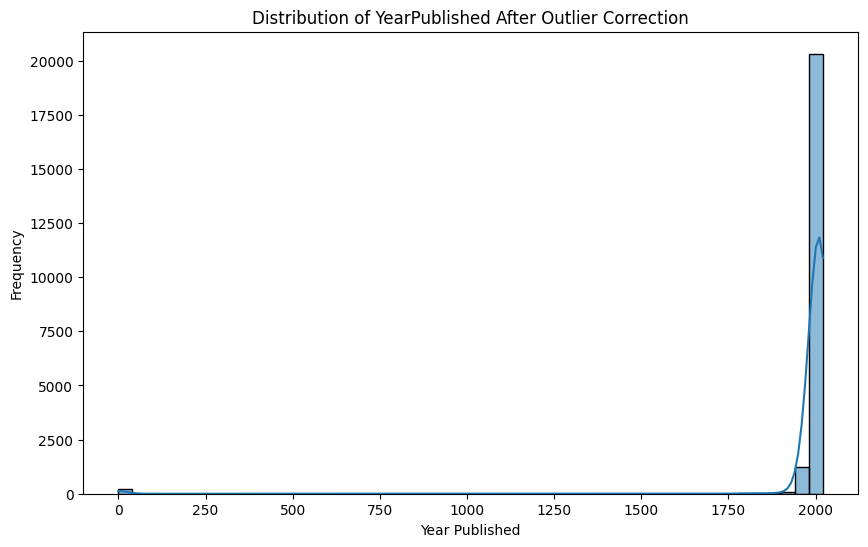

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearPublished'].dropna(), bins=50, kde=True)
plt.title('Distribution of YearPublished After Outlier Correction')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Tae games with 'YearPublished' == 0 and replace with 'NaN
df['YearPublished'] = df['YearPublished'].replace(0, np.nan)

In [8]:
# Categorize games based on publication era
# Traditional games of year published unknown (NaN) o  == 0
# Yes = 1 No = 0
df['Is_traditional_game'] = df['YearPublished'].isna().astype(int)
df[df['Is_traditional_game'] == 1]

BGGId                  Name  \
61      29351                 Durak   
181     19257               Le Truc   
392     41955    Eurooppa Tietopeli   
751     42499                  1000   
806      5432    Chutes and Ladders   
...       ...                   ...   
21518   11581                  King   
21555  210292             Moonstone   
21623    1602  The Royal Game of Ur   
21652  156878              tummple!   
21881   23049      Hedbanz for Kids   

                                             Description  YearPublished  \
61     durak known popular card game russia ukraine d...            NaN   
181    le truc th century card game france spain sid ...            NaN   
392    classic trivium game   question answer europe ...            NaN   
751    classic card game player try earn   point seri...            NaN   
806    traditional game ancient india bring uk   comm...            NaN   
...                                                  ...            ...   
21518  king relative barbu trick take standard deck p...            NaN   
21555  moonstone whimsical fantasy skirmish game play...            NaN   
21623  game publish different name simple race game l...            NaN   
21652  wooden stackingandbuilde game tummple player t...            NaN   
21881  publisher web sitethe quick question game ldqu...            NaN   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
61         1.5263     1.8234           2           6   8.000000      1.000000   
181        1.7500     1.8967           2           4        NaN     36.000000   
392        2.0000     2.1967           2           6   8.000000    515.000000   
751        1.8000     2.0835           2           4   8.000000           NaN   
806        1.0195     1.1979           2           6   3.357143     16.000000   
...           ...        ...         ...         ...        ...           ...   
21518      2.0000     2.2389           4           4  10.000000           NaN   
21555      2.0000     2.1836           2           4  12.000000    164.000000   
21623      1.3000     1.5190           2           2   7.750000    141.000000   
21652      1.0000     1.1706           2          10   8.000000    501.000000   
21881      1.0000     1.1806           2           6   5.000000    151.333333   

       ...  Cat:Thematic Cat:Strategy  Cat:War  Cat:Family  Cat:CGS  \
61     ...             0            0        0           0        0   
181    ...             0            0        0           0        0   
392    ...             0            0        0           0        0   
751    ...             0            0        0           0        0   
806    ...             0            0        0           0        0   
...    ...           ...          ...      ...         ...      ...   
21518  ...             0            0        0           0        0   
21555  ...             0            0        0           0        0   
21623  ...             0            0        0           0        0   
21652  ...             0            0        0           0        0   
21881  ...             0            0        0           0        0   

       Cat:Abstract  Cat:Party  Cat:Childrens  Rating  Is_traditional_game  
61                0          1              0  Medium                    1  
181               0          0              0  Medium                    1  
392               0          0              0     Low                    1  
751               0          0              0  Medium                    1  
806               0          0              1     Low                    1  
...             ...        ...            ...     ...                  ...  
21518             0          0              0  Medium                    1  
21555             0          0              0    High                    1  
21623             1          0              0     Low                    1  
21652             0          0            

In [9]:
# Define function to categorize publication era

def publication_era(year):
    if pd.isna(year):
        return 'ancient'
    elif year < 1950:
        return 'classic'
    elif year < 1990:
        return 'modern_early'
    else:
        return 'modern'

df['Publication_era'] = df['YearPublished'].apply(publication_era)

In [10]:
df[df['Publication_era']=='classic']

BGGId                   Name  \
47       6819                   Skat   
209     17568  Magic Robot Quiz Game   
262      1644              Tipp-Kick   
488      1917               Stratego   
530    152359            Machiavelli   
...       ...                    ...   
21554   18536             Nok-Hockey   
21704    2086            Elfer raus!   
21707   20240                 Écarté   
21802   18011             Chaturanga   
21883    4325               Conflict   

                                             Description  YearPublished  \
47     traditional german card game player play stand...         1810.0   
209    market board game magic robot quiz game probab...         1935.0   
262    player soccer game metal miniature   player   ...         1921.0   
488    boxthe gameboard battlefield   army man dispos...         1946.0   
530    main action player decide playplay valid combi...         1940.0   
...                                                  ...            ...   
21554  action game play special table knock puck goal...         1942.0   
21704  player attempt hand play starting card grid pa...         1925.0   
21707  quick trick take game base triomphe french ruf...         1825.0   
21802  publish game magazine januaryfebruary   issue ...          550.0   
21883  conflict player military miniature symmetrical...         1940.0   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
47         3.0561     3.1608           3           3   9.666667      6.000000   
209        1.0000     1.2950           1           0        NaN           NaN   
262        1.2340     1.4225           2           2   7.166667      6.000000   
488        1.8486     2.0670           2           2   7.597222     31.045455   
530        1.7143     1.8975           2           6   6.000000    171.000000   
...           ...        ...         ...         ...        ...           ...   
21554      1.0000     1.1597           2           2   4.000000    441.000000   
21704      1.0909     1.1927           2           6   6.285714     41.000000   
21707      2.1250     2.2253           2           2  12.000000           NaN   
21802      2.2500     2.3746           2           4        NaN    126.000000   
21883      1.3846     1.5127           2           4   6.000000           NaN   

       ...  Cat:Strategy Cat:War  Cat:Family  Cat:CGS  Cat:Abstract  \
47     ...             1       0           0        0             0   
209    ...             0       0           0        0             0   
262    ...             0       0           1        0             0   
488    ...             0       0           1        0             1   
530    ...             0       0           0        0             0   
...    ...           ...     ...         ...      ...           ...   
21554  ...             0       0           0        0             0   
21704  ...             0       0           1        0             0   
21707  ...             0       0           0        0             0   
21802  ...             0       0           0        0             1   
21883  ...             0       1           0        0             0   

       Cat:Party  Cat:Childrens  Rating  Is_traditional_game  Publication_era  
47             0              0  Medium                    0          classic  
209            0              1     Low                    0          classic  
262            0              0  Medium                    0          classic  
488            0              0     Low                    0          classic  
530            0              0  Medium                    0          classic  
...          ...            ...     ...                  ...              ...  
21554          0              0  Medium                    0          classic  
21704          0              0     Low                    0          classic  
21707          0              0  Medium                    0          classic  


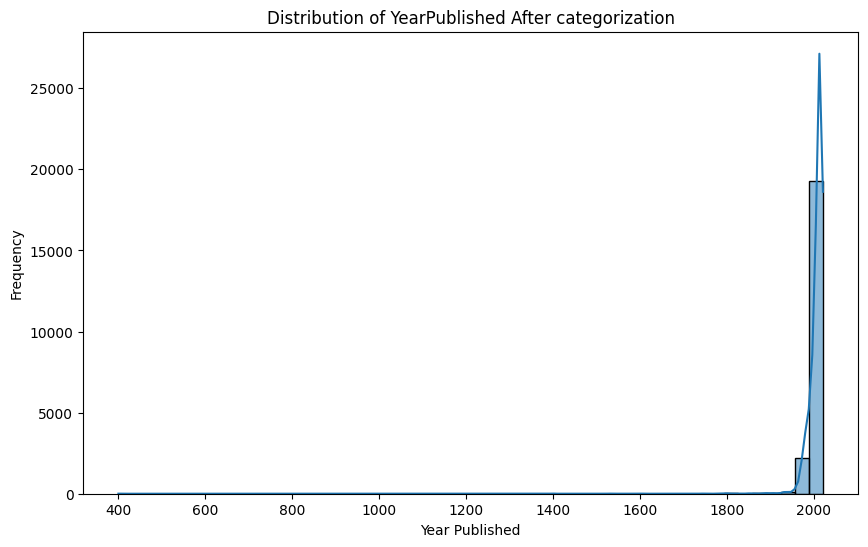

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearPublished'].dropna(), bins=50, kde=True)
plt.title('Distribution of YearPublished After categorization')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

## Handle missing values 'ComAgeRec'

The missing values analysis for the attribute **'ComAgeRec'**  concern 5530 games (a quarter of the total) that generally games that have not a recommended age are accessible to everyone.

So is a good compromise to aplly on these games the column median value to preserve data coherence.

Consider that only 41 games have a recommended age higher that 18 y.o. Between 17 and 18 both included we have 108 games. Between 16 included and 17 we have 938 games. Between 15 included and 16 we have 339 games. Between 14 included and 15 we have 1086 games.
13 incl.-14: 659 g.

12 incl.-13: 2124 g.

11 incl.-12: 1078 g.

10 incl.-11: 2413 g.

9 incl.-10: 1154 g.

8 incl.-9: 2869 g. (1007 g. has the same MfgAgeRec)

2 incl.-8: 3586 g. (343 g. has the same MfgAgeRec)
There are no games with recommended age lower than 2.

In the end, considering that 'MfgAgeRec' attribute has no missing values, a possibility is to assign the corresponding 'MfgAgeRec' value to the 'ComAgeRec' missing ones. But for games that have zero values for 'MfgAgeRec', there's the chance to drop them but in alternative we can apply the median value of the 'ComAgeRec' column.

There are then cases of games without playtime (zero values for 'MfgAgeRec').

As examples we analized a few games:

- Gùgōng: Deluxe Big Box
- Treasures of Cibola
- Le Grand Empire

https://share.google/aimode/JFGKfBqCbHxx9QzRy

In [12]:
# number of rows with ComAgeRec missing
number = len(df[df['ComAgeRec'].isnull()])
print(f"Numero di righe con ComAgeRec mancante: {number}")
df[df['ComAgeRec'].isnull()]

Numero di righe con ComAgeRec mancante: 5530


BGGId                                   Name  \
2      319196                 Gùgōng: Deluxe Big Box   
4      281020                    Treasures of Cibola   
6       25841                        Le Grand Empire   
7       89620  Monopoly: Canada (Electronic Banking)   
9      130185                          Speedy Recall   
...       ...                                    ...   
21885  149459                             Assaultous   
21891  300217             Merchants of the Dark Road   
21900  181031                             Sweet Spot   
21906  159877                              Hat-Trick   
21916  296667                                Vintage   

                                             Description  YearPublished  \
2      big box contain component gugravegng deluxe ed...         2020.0   
4      rescue   mayan   treasure       easy   task   ...         2019.0   
6      le grand empire simulate napoleonic war     st...         2007.0   
7      modern canadian edition classic real estate ga...         2009.0   
9      box shuffle card ready shuffle head quick s mo...         2012.0   
...                                                  ...            ...   
21885  assaultous twoplayer strategy game role comman...         2013.0   
21891  half year daylight prepare dark season road tr...         2021.0   
21900  court trusty racket battle intense tennis game...         2017.0   
21906  expand      hattrick player expansion hattrick...         2014.0   
21916  seller collector vintage object flea market lo...         2020.0   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
2          3.6667     3.8190           1           5        NaN           NaN   
4          1.5000     1.6230           2           4        NaN           7.0   
6          3.7000     3.8964           2           7        NaN         388.0   
7          1.0000     1.2785           2           6        NaN           NaN   
9          1.0000     1.1469           2           6        NaN           NaN   
...           ...        ...         ...         ...        ...           ...   
21885      2.3333     2.5379           2           2        NaN           NaN   
21891      2.9333     3.1553           1           4        NaN         188.0   
21900      1.5000     1.6821           1           4        NaN           NaN   
21906      2.7273     3.0250           2           2        NaN         636.0   
21916      1.0000     1.1474           3           6        NaN           NaN   

       ...  Cat:Strategy Cat:War  Cat:Family  Cat:CGS  Cat:Abstract  \
2      ...             0       0           0        0             0   
4      ...             0       0           0        0             0   
6      ...             0       1           0        0             0   
7      ...             0       0           0        0             0   
9      ...             0       0           0        0             0   
...    ...           ...     ...         ...      ...           ...   
21885  ...             0       0           0        0             0   
21891  ...             1       0           0        0             0   
21900  ...             1       0           0        0             0   
21906  ...             0       0           0        0             0   
21916  ...             0       0           0        0             0   

       Cat:Party  Cat:Childrens  Rating  Is_traditional_game  Publication_era  
2              0              0    High                    0           modern  
4              0              0  Medium                    0           modern  
6              0              0    High                    0           modern  
7              0              0     Low                    0           modern  
9              0              0  Medium                    0           modern  
...          ...            ...     ...                  ...              ...  
21885          0              0    High         

### The strategy
is replacing the missing values with the manufacturer recomended age (MfgAgeRec) or median of the community recommended age (ComAgeRec)

In [13]:
# Calculate the 'ComAgeRec' column median
median_com_age_rec = df['ComAgeRec'].median()
# Conditional imputation row by row
df['ComAgeRec'] = df.apply(
    lambda row: row['MfgAgeRec'] if pd.isna(row['ComAgeRec']) and not pd.isna(row['MfgAgeRec'])
    else (median_com_age_rec if pd.isna(row['ComAgeRec']) or (row['ComAgeRec'] == 0) else row['ComAgeRec']),
    axis=1
)
# Verifying missing values
print(f"Miss mancanti nella colonna 'ComAgeRec' dopo l'imputazione: {df['ComAgeRec'].isnull().sum()}")

Miss mancanti nella colonna 'ComAgeRec' dopo l'imputazione: 0


## Handle Outliers in ComAgeRec

### Strategy

In view of the subsequent clustering and classification analyses, a semantic recoding strategy was applied to the ComAgeRec attribute by grouping it into ordinal age classes. This approach reduces the impact of extreme values on distance-based algorithms, improving model stability while preserving the interpretative meaning of the variable.

Outlier management was therefore carried out through a targeted transformation of the variable rather than through data removal, ensuring a methodologically sound approach consistent with the analytical objectives of the study.

In [14]:
print("Values in 'ComAgeRec' greater than 18:")
print(df[df['ComAgeRec'] > 18]['ComAgeRec'].value_counts().sort_index())

Values in 'ComAgeRec' greater than 18:
ComAgeRec
18.250000     1
18.333333     4
18.500000     2
19.000000     3
19.166667     1
19.333333     1
19.500000     1
20.000000     1
21.000000    32
Name: count, dtype: int64


In [15]:
# classification based on ComAgeRec
def com_age_rec_class(age):
    if age <= 6:
        return 0   # Children
    elif age <= 10:
        return 1   # Family / Casual
    elif age <= 14:
        return 2   # Strategy
    else:
        return 3   # 15+ / Adult / Hardcore

df['ComAgeRec_class'] = df['ComAgeRec'].apply(com_age_rec_class)

In [16]:
# class of children's games
print('Children games class')
df[df['ComAgeRec_class']== 0][['Name','ComAgeRec','YearPublished']]

Children games class


Name  ComAgeRec  YearPublished
6          Le Grand Empire   0.000000         2007.0
9            Speedy Recall   6.000000         2012.0
14          Break the Safe   5.555556         2003.0
17     The Legend of Zelda   6.000000         1988.0
18                 Frogger   4.000000         1981.0
...                    ...        ...            ...
21886        Giggle Wiggle   3.333333         1991.0
21887            Le Boomb!   4.500000         2009.0
21910        Creepy Freaks   5.000000         2003.0
21917    Sequence for Kids   4.200000         2001.0
21921             Leapfrog   6.000000         2004.0

[3074 rows x 3 columns]

## Handle MfgPlaytime Zero Values
We observed a small number of games (5) that, more than having missing values for 'ComAgeRec' zero values for 'MfgAgeRec', have zero values for 'MfgPlayTime', for 'MinPlaytime', for 'MaxPlayTime', for both 'ComWeight and for 'LanguageEase'.

Considering all these penalties for whom these games are not eligible for further analysis, we evaluated to drop them.

In [17]:
righe = df[(df['ComAgeRec'].isnull()) & (df['MfgAgeRec'] == 0) & (df['MfgPlaytime'] == 0) & (df['ComMinPlaytime'] == 0) & (df['ComMaxPlaytime'] == 0) & (df['GameWeight'] == 0) & (df['ComWeight'] == 0) & (df['LanguageEase'].isnull())][['Name', 'ComAgeRec', 'MfgAgeRec', 'GameWeight','ComWeight', 'MfgPlaytime', 'LanguageEase']]
print(f"Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: {len(righe)}")
righe


Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: 0


Empty DataFrame
Columns: [Name, ComAgeRec, MfgAgeRec, GameWeight, ComWeight, MfgPlaytime, LanguageEase]
Index: []

In [18]:
# drop of critical games
df = df.drop(righe.index)

In [19]:
righe = df[(df['ComAgeRec'].isnull()) & (df['MfgAgeRec'] == 0) & (df['MfgPlaytime'] == 0) & (df['ComMinPlaytime'] == 0) & (df['ComMaxPlaytime'] == 0) & (df['GameWeight'] == 0) & (df['ComWeight'] == 0) & (df['LanguageEase'].isnull())][['Name', 'ComAgeRec', 'MfgAgeRec', 'GameWeight','ComWeight', 'MfgPlaytime', 'LanguageEase']]
print(f"Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: {len(righe)}")
righe

Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: 0


Empty DataFrame
Columns: [Name, ComAgeRec, MfgAgeRec, GameWeight, ComWeight, MfgPlaytime, LanguageEase]
Index: []

## Handle Family Missing Values

Firstly we check how many games present same values for their names ('Name') and their belonging family ('Family')

In [20]:
name_as_fam = len(df[df['Name']==df['Family']])
print(f"Number of rows with Name same as Family: {name_as_fam}")
numero2 = ((df['Name'] != df['Family']) & df['Family'].notnull()).sum()
print(f"Numero di righe con Name diverso da Family: {numero2}")
numero3 = (df['Name'].notna() & df['Name'].str.strip().ne('') & df['Family'].isna()).sum()
print(f"numero di righe con Family mancante: {numero3}")
df[df['Name']==df['Family']]

Number of rows with Name same as Family: 342
Numero di righe con Name diverso da Family: 6321
numero di righe con Family mancante: 15262


BGGId                              Name  \
8        8983                         I.Q. 2000   
81      47055                     High Frontier   
95      54998                          Cyclades   
122    232405                   Western Legends   
146    314243  Warhammer 40,000 (Ninth Edition)   
...       ...                               ...   
21609    5749                             Simon   
21733   20437                    Lords of Vegas   
21751     163                        Balderdash   
21759  161578                        [redacted]   
21804  163413                            Murano   

                                             Description  YearPublished  \
8      children trivium game player outward solar sys...         1984.0   
81     near future nanofacture technique allow incred...         2010.0   
95     late collaboration bruno cathala ludovic maubl...         2009.0   
122    historic character american wild west face wri...         2018.0   
146    publisherrsquo websitethere time peace forgive...         2020.0   
...                                                  ...            ...   
21609  simon large round electronic box player press ...         1978.0   
21733  opponent represent powerful developer burgeon ...         2010.0   
21751  clever repackaging parlor game dictionary bald...         1984.0   
21759  redact game spycraft intrigue betrayal bluffin...         2014.0   
21804  murano game set murano small group seven islan...         2014.0   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
8          1.6667     1.9372           2           6   8.000000     19.666667   
81         4.3319     4.5688           2           5  14.090909     32.450000   
95         2.8176     3.0428           2           5  11.287671     21.133333   
122        2.8000     2.9178           2           6  10.666667      3.312500   
146        3.8571     4.0246           2           6  12.000000           NaN   
...           ...        ...         ...         ...        ...           ...   
21609      1.2535     1.5497           1           4   4.285714     31.000000   
21733      2.3556     2.4787           2           4  11.142857     11.125000   
21751      1.4139     1.6276           2           6  11.894737     14.944444   
21759      2.9250     3.0484           2           6  10.800000    196.000000   
21804      2.7273     2.8412           2           4  10.666667      3.000000   

       ...  Cat:War Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  \
8      ...        0          0        0             0          0   
81     ...        0          0        0             0          0   
95     ...        0          0        0             0          0   
122    ...        0          0        0             0          0   
146    ...        1          0        0             0          0   
...    ...      ...        ...      ...           ...        ...   
21609  ...        0          0        0             0          0   
21733  ...        0          0        0             0          0   
21751  ...        0          0        0             0          1   
21759  ...        0          0        0             0          0   
21804  ...        0          0        0             0          0   

       Cat:Childrens  Rating  Is_traditional_game  Publication_era  \
8                  0     Low                    0     modern_early   
81                 0    High                    0           modern   
95                 0    High                    0           modern   
122                0    High                    0           modern   
146                0    High                    0           modern   
...              ...     ...                  ...              ...   
21609              1     Low                    0     modern_early   
21733              0    High                    0           modern   
21751              0  Medium                    0     modern_early   
2175

### Logic
Considering that a considerable part of games present same values for the attribute 'Name' and 'Family' (the game's family correspond to its name) we can consider the possibility to replace the 'Family' missing values with the corresponding 'Name' value

In [21]:
print("Replacing 'Family' missing values with corresponding 'Name' values")
df['Family'] = df['Family'].fillna(df['Name'].where(df['Family'].isnull()))
df

Replacing 'Family' missing values with corresponding 'Name' values


BGGId                     Name  \
0      140386  Assassin's Creed: Arena   
1      344114             Bag of Chips   
2      319196   Gùgōng: Deluxe Big Box   
3       11404               LetterFlip   
4      281020      Treasures of Cibola   
...       ...                      ...   
21920    3233                  Ballast   
21921   13359                 Leapfrog   
21922    3295                    Athos   
21923  176524     Hoplomachus: Origins   
21924    4814                   Rubout   

                                             Description  YearPublished  \
0      game description publisherin assassins creed a...         2014.0   
1      bag chip party game face crucial choice score ...         2021.0   
2      big box contain component gugravegng deluxe ed...         2020.0   
3      publisherthe reveal game secret wordsletterfli...         2004.0   
4      rescue   mayan   treasure       easy   task   ...         2019.0   
...                                                  ...            ...   
21920  variation game quotpick sticksquot wooden cyli...         1998.0   
21921  leapfrog fun family game simple young gamer pl...         2004.0   
21922  monk climb athos mountain reach monastery move...         1993.0   
21923  hoplomachu origin take story begin small battl...         2015.0   
21924  rulesquotthe goal rubout player   cash hand pl...         1989.0   

       GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0          1.8333     2.0512           2           4        8.0         213.0   
1          1.0000     1.2256           2           5        8.0          36.0   
2          3.6667     3.8190           1           5       12.0           NaN   
3          1.3077     1.4216           2           2        7.0           NaN   
4          1.5000     1.6230           2           4        8.0           7.0   
...           ...        ...         ...         ...        ...           ...   
21920      1.0000     1.2096           2           4        8.0          11.0   
21921      1.5000     1.7219           1           6        6.0         361.0   
21922      1.6667     1.7946           2           4       11.0         431.0   
21923      3.0370     3.2921           1           2       13.8         322.0   
21924      1.7692     1.9113           2           8       12.0        1199.0   

       ...  Cat:War Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  \
0      ...        0          0        0             0          0   
1      ...        0          0        0             0          0   
2      ...        0          0        0             0          0   
3      ...        0          0        0             0          0   
4      ...        0          0        0             0          0   
...    ...      ...        ...      ...           ...        ...   
21920  ...        0          0        0             0          0   
21921  ...        0          0        0             0          0   
21922  ...        0          0        0             0          0   
21923  ...        0          0        0             0          0   
21924  ...        0          0        0             1          0   

       Cat:Childrens  Rating  Is_traditional_game  Publication_era  \
0                  0     Low                    0           modern   
1                  0  Medium                    0           modern   
2                  0    High                    0           modern   
3                  0     Low                    0           modern   
4                  0  Medium                    0           modern   
...              ...     ...                  ...              ...   
21920              0     Low                    0           modern   
21921              0  Medium                    0           modern   
21922              0     Low                    0           modern   
21923              0    High                    0           modern   
21924              0     Low              

In [22]:
# Verifying the number of rows with 'Family' missing after the imputation

number = len(df[df['Family'].isnull()])
print(f"Number of rows with 'Family' missing after the imputation: {number}")

Number of rows with 'Family' missing after the imputation: 0


## Handle MinPlayers and MaxPlayers Outliers

### Strong adjustment for `MinPlayers == 0` e `MaxPlayers < MinPlayers`

Goal:
- Ensure that `MinPlayers` assume a reasonable value (not 0 that's impossible) and that `MaxPlayers >= MinPlayers`.
- Trace all the audit changes through dedicated columns.

Strategy (roadmap):
1. Adjust `MinPlayers == 0` using `BestPlayers` when is a valid value, then take the `Family` median, otherwise impute 1.
2. Adjust `MaxPlayers` when is a missing value or < `MinPlayers`: try to transform with `BestPlayers` value, than take the median or the median span (Max-Min) per `MinPlayers`, at the end we could apply a global fallback `MinPlayers + global_span_median`.
3. Register the adjustment sources in the audit columns to consent further check processes.

This logic avoid not-informative imputations (i.e median = 0) and use semantic informations when available.

### MinPlayer Management > MaxPlayers

Attribute **BestPlayers**

It is the optimal number of players according to the community, the natural upper limit: a game cannot have MaxPlayers < BestPlayers
Much more consistent than the general average
- The **logic**:

- Use **BestPlayers** when **> 0 and >= MinPlayers**.
- Otherwise try MaxPlayers' median for Family (if available and not 'Unknown').
If a game has MaxPlayers < MinPlayers (problem) and belongs to a specific Family category, then: I look at all other games in the same category (e.g. Family = 'Monopoly')
We have calculated the median of their valid MaxPlayers (e.g. median = 6) and used that median as the imputed value for the problem game
Finally fallback to MinPlayers (ensures consistency).
Than we added a MaxPlayers_imputed flag column to track imputations.


- Game A: Family='Strategy', MinPlayers=2, MaxPlayers=1 ❌ PROBLEM (1 < 2)
- Game B: Family='Strategy', MinPlayers=2, MaxPlayers=4 OK
- Game C: Family='Strategy', MinPlayers=1, MaxPlayers=8 OK
- Game D: Family='Strategy', MinPlayers=4, MaxPlayers=6 OK

Median of [4, 8, 6] = 6
**Game A: MaxPlayers = 6**


To deal with these issues it was defined a cleaning and imputation procedure that not only corrected the incorrect values, but that made the process transparent, reproducible and methodologically justifiable. To this end, the 'MinPlayers' and 'MaxPlayers' original values have been preserved in separate columns, to allow a direct comparison with the correct values and keep track of the changes made.

The adopted strategy is based on a hierarchical approach, in which imputations are carried out by privileging, where possible, more specific and semantically significant information sources, and then progressively resorting to more general statistical estimates. Furthermore, to reduce the influence of outliers, it was chosen to use the median as a measure of central tendency, considered more robust than the mean in the presence of skewed distributions.

For the attribute 'MinPlayers', missing or equal to zero values were considered semantically invalid. When available it was adopted the corresponding 'BestPlayers' value, which represent the optimal number of players for the game and thus constitutes a reliable information source. In cases there was not such information, the median of 'MinPlayers' values within the same game family was used, thus exploiting the semantic structure of the dataset. Only in the absence of both of this informations was a fallback value of 1 adopted, which represents the semantically acceptable minimum.

A similar, but more complex, procedure was applied to the 'MaxPlayers' attribute, limited to cases where the value was missing or less than 'MinPlayers' one. Again, when possible, the 'BestPlayers' value was used, as long as it was consistent with the minimum number of players. Alternatively, the median of 'MaxPlayers' values was used for the same family of games. In cases where such information was unavailable or unreliable, imputation was performed by estimating the “span” between the maximum and minimum number of players, calculated as the difference between 'MaxPlayers' and 'MinPlayers'. This span was estimated firstly on a game family level, than according to 'MinPlayers' value and, as a last resort, globally on the entire dataset. The estimate value was than added to MinPlayers, ensuring in any case that logical consistency between the two fields was respected.

For each correction or imputation performed, specific Boolean indicators and descriptive metadata have been introduced, which allow us to precisely identify which records have been modified and which was the source of the imputation. This aspect is particularly relevant in a scientific analysis context, as it allows us to evaluate the impact of cleaning operations on the final results.

At the end of the procedure, all values of MinPlayers and MaxPlayers were converted to integers and the consistency condition MaxPlayers ≥ MinPlayers was forced as an additional security measure. This resulted in a consistent, semantically valid dataset ready for subsequent analysis phases, minimizing information loss and maintaining a high level of methodological transparency.

In [23]:
# General view of MinPlayers and MaxPlayers columns
numero  = len(df[df['MinPlayers']>df['MaxPlayers']])
print(f"Numero di righe con MinPlayers > MaxPlayers: {numero}")
numero2 = df[df['MinPlayers']<= 0]
print(f"Numero di righe con MinPlayers <= 0: {len(numero2)}")
numero3 = len(df[df['MaxPlayers']<= 0])
print(f"Numero di righe con MaxPlayers <= 0: {numero3}")
numero2.head(5)

Numero di righe con MinPlayers > MaxPlayers: 132
Numero di righe con MinPlayers <= 0: 50
Numero di righe con MaxPlayers <= 0: 173


BGGId                                 Name  \
268    17821                     Connection Games   
733   150012  No Retreat!: Polish & French Fronts   
1104  109070         Eden: Survive the Apocalypse   
1333   24105               The Da Vinci Code Game   
1486  160950                      The Badger Deck   

                                            Description  YearPublished  \
268   comprehensive study connection game genre brow...         2005.0   
733   follow success retreat russian world war ii be...         2018.0   
1104  release   french fantasy miniature company tab...         2009.0   
1333  quotnow live adventure pf da vinci code play g...         2006.0   
1486  badger deck expand deck playing card suitable ...         2014.0   

      GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
268       3.3333     3.5573           0           0        0.0         596.0   
733       3.5385     3.8120           0           2       14.0          19.0   
1104      3.0000     3.2214           0           2       10.0           NaN   
1333      2.8000     3.0562           0           0       16.5          10.0   
1486      1.0000     1.2625           0           0        6.0         596.0   

      ...  Cat:War Cat:Family  Cat:CGS  Cat:Abstract  Cat:Party  \
268   ...        0          0        0             1          0   
733   ...        1          0        0             0          0   
1104  ...        0          0        0             0          0   
1333  ...        0          0        0             0          0   
1486  ...        0          0        0             0          0   

      Cat:Childrens  Rating  Is_traditional_game  Publication_era  \
268               0    High                    0           modern   
733               0    High                    0           modern   
1104              0    High                    0           modern   
1333              0     Low                    0           modern   
1486              0    High                    0           modern   

      ComAgeRec_class  
268                 0  
733                 2  
1104                1  
1333                3  
1486                0  

[5 rows x 49 columns]

In [24]:
print("Descriptive statistics for 'MaxPlayers' before cleaning:")
df['MaxPlayers'].describe()

Descriptive statistics for 'MaxPlayers' before cleaning:


count    21925.000000
mean         5.707868
std         15.014643
min          0.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

In [25]:
# Robust fix for MinPlayers==0 and MaxPlayers < MinPlayers

# Save originals

df['MinPlayers_orig'] = df['MinPlayers']
df['MaxPlayers_orig'] = df['MaxPlayers']


# Audit columns

df['MinPlayers_fixed'] = False
df['MinPlayers_fixed_source'] = None
df['MaxPlayers_imputed'] = False
df['MaxPlayers_imputed_source'] = None


# Span (Max - Min)

span = (df['MaxPlayers'] - df['MinPlayers']).replace([np.inf, -np.inf], np.nan)

span_by_family = span.groupby(df['Family']).median()
span_by_family = span_by_family.round().astype('Int64')

global_span_median = span.dropna().median()
if pd.isna(global_span_median) or global_span_median < 1:
    global_span_median = 1
global_span_median = int(round(global_span_median))


# 1) FIX MinPlayers == 0 o NaN

mask_min0 = df['MinPlayers'].fillna(0) == 0

# a) BestPlayers
cond = mask_min0 & (df['BestPlayers'] > 0)
df.loc[cond, 'MinPlayers'] = df.loc[cond, 'BestPlayers'].astype(int)
df.loc[cond, 'MinPlayers_fixed'] = True
df.loc[cond, 'MinPlayers_fixed_source'] = 'bestplayers'

# b) Mediana MinPlayers per Family
mask_min0 = df['MinPlayers'].fillna(0) == 0
min_by_family = df.groupby('Family')['MinPlayers'].median().round().astype('Int64')

cond = (
    mask_min0 &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(min_by_family).notna() &
    (df['Family'].map(min_by_family) > 0)
)

df.loc[cond, 'MinPlayers'] = df.loc[cond, 'Family'].map(min_by_family).astype(int)
df.loc[cond, 'MinPlayers_fixed'] = True
df.loc[cond, 'MinPlayers_fixed_source'] = 'family_min_median'

# c) Fallback → 1
mask_min0 = df['MinPlayers'].fillna(0) == 0
df.loc[mask_min0, 'MinPlayers'] = 1
df.loc[mask_min0, 'MinPlayers_fixed'] = True
df.loc[mask_min0, 'MinPlayers_fixed_source'] = 'set_to_1'

df['MinPlayers'] = df['MinPlayers'].astype(int)


# 2) FIX MaxPlayers mancanti o < MinPlayers

mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])

# a) BestPlayers
cond = mask_problem & (df['BestPlayers'] >= df['MinPlayers'])
df.loc[cond, 'MaxPlayers'] = df.loc[cond, 'BestPlayers'].astype(int)
df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'bestplayers'

# b) Mediana MaxPlayers per Family
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
max_by_family = df.groupby('Family')['MaxPlayers'].median().round().astype('Int64')

cond = (
    mask_problem &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(max_by_family).notna() &
    (df['Family'].map(max_by_family) > 0)
)

df.loc[cond, 'MaxPlayers'] = df.loc[cond, 'Family'].map(max_by_family).astype(int)
df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'family_max_median'

# c) Span per Family → Max = Min + span
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
cond = (
    mask_problem &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(span_by_family).notna() &
    (df['Family'].map(span_by_family) > 0)
)

df.loc[cond, 'MaxPlayers'] = (
    df.loc[cond, 'MinPlayers'] +
    df.loc[cond, 'Family'].map(span_by_family)
).astype(int)

df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'family_span_median'

# d) Span per MinPlayers
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
span_by_min = span.groupby(df['MinPlayers']).median().round().astype('Int64')

cond = (
    mask_problem &
    df['MinPlayers'].map(span_by_min).notna() &
    (df['MinPlayers'].map(span_by_min) > 0)
)

df.loc[cond, 'MaxPlayers'] = (
    df.loc[cond, 'MinPlayers'] +
    df.loc[cond, 'MinPlayers'].map(span_by_min)
).astype(int)

df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'minplayers_span_median'

# e) Fallback globale
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
df.loc[mask_problem, 'MaxPlayers'] = (
    df.loc[mask_problem, 'MinPlayers'] + global_span_median
).astype(int)

df.loc[mask_problem, 'MaxPlayers_imputed'] = True
df.loc[mask_problem, 'MaxPlayers_imputed_source'] = 'global_span_fallback'


# Sicurezza finale

df['MaxPlayers'] = df['MaxPlayers'].astype(int)
df.loc[df['MaxPlayers'] < df['MinPlayers'], 'MaxPlayers'] = df['MinPlayers']


# Summary

print("Fixed MinPlayers:", df['MinPlayers_fixed'].sum())
print("Imputed MaxPlayers:", df['MaxPlayers_imputed'].sum())
print("Remaining Max < Min:", (df['MaxPlayers'] < df['MinPlayers']).sum())

df_modificati = df[df['MinPlayers_fixed_source'].notna()]

df_modificati[['Name', 'Family', 'MinPlayers', 'MaxPlayers',
               'BestPlayers', 'MinPlayers_fixed',
               'MinPlayers_fixed_source']].head(10)


Fixed MinPlayers: 50
Imputed MaxPlayers: 174
Remaining Max < Min: 0


Name  \
268                      Connection Games   
733   No Retreat!: Polish & French Fronts   
1104         Eden: Survive the Apocalypse   
1333               The Da Vinci Code Game   
1486                      The Badger Deck   
1576                  Aspern-Essling 1809   
2805                       Friedland 1807   
3019                Unpublished Prototype   
3522                            Piecepack   
3597                    The Mediterranean   

                                       Family  MinPlayers  MaxPlayers  \
268                          Connection Games           1           4   
733                No Retreat! (Carl Paradis)           2           2   
1104             Eden: Survive the Apocalypse           1           2   
1333                   The Da Vinci Code Game           1           4   
1486                          The Badger Deck           1           4   
1576  Collection Jeux d'Histoire (Vae Victis)           2           2   
2805           Jours de Gloire (Frédéric Bey)           2           2   
3019                    Unpublished Prototype           4           4   
3522                                Piecepack           1           4   
3597      Struggle for Europe (Clash of Arms)           2           6   

      BestPlayers  MinPlayers_fixed MinPlayers_fixed_source  
268             0              True                set_to_1  
733             0              True       family_min_median  
1104            0              True                set_to_1  
1333            0              True                set_to_1  
1486            0              True                set_to_1  
1576            0              True       family_min_median  
2805            0              True       family_min_median  
3019            4              True             bestplayers  
3522            0              True                set_to_1  
3597            0              True       family_min_median

In [26]:
# Verifica del numero di righe con Family mancante dopo l'imputazione
numero = len(df[df['Family'].isnull()])
numero1 = ((df['MaxPlayers'] < df['MinPlayers'])).sum()
print(f"Numero di righe con Family mancante dopo l'imputazione: {numero}")
print(f"Numero di righe con MinPlayers > MaxPlayers dopo l'imputazione: {numero1}")
numero2 = len(df[df['MinPlayers']<= 0])
print(f"Numero di righe con MinPlayers <= 0: {numero2}")
numero3 = len(df[df['MaxPlayers']<= 0])
print(f"Numero di righe con MaxPlayers <= 0: {numero3}")

Numero di righe con Family mancante dopo l'imputazione: 0
Numero di righe con MinPlayers > MaxPlayers dopo l'imputazione: 0
Numero di righe con MinPlayers <= 0: 0
Numero di righe con MaxPlayers <= 0: 0


In [27]:
print('\nDescriptive statistic of MaxPlayers')
print(df['MaxPlayers'].describe())
print('\nDescriptive statistic of MinPlayers')
print(df['MinPlayers'].describe())


Descriptive statistic of MaxPlayers
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

Descriptive statistic of MinPlayers
count    21925.000000
mean         2.010217
std          0.687938
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: MinPlayers, dtype: float64


### Transformed Distribution of MinPlayers and MaxPlayers

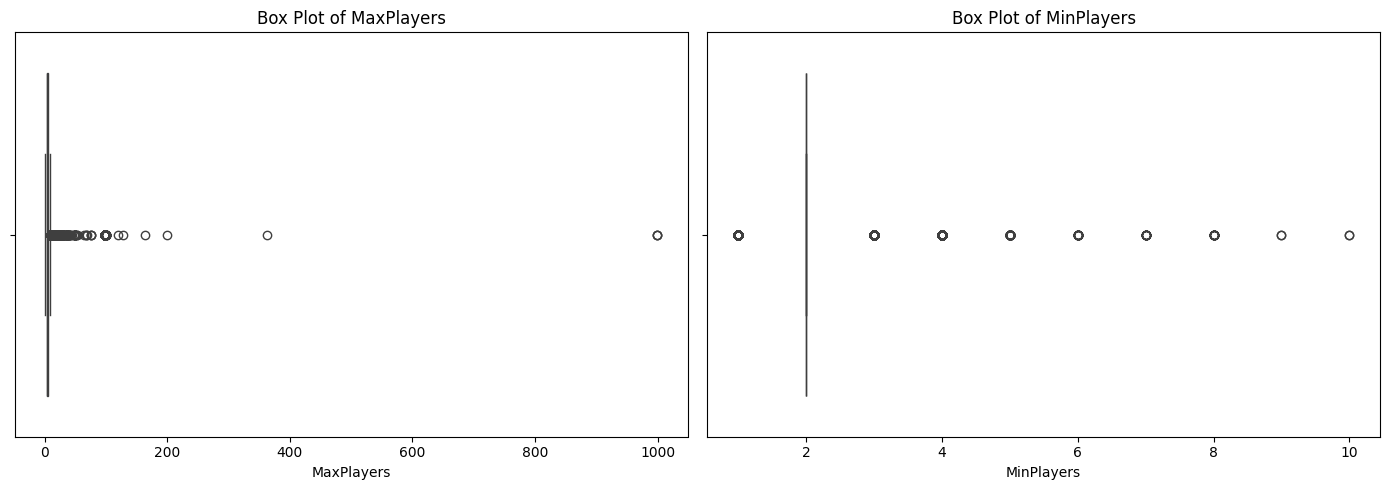

In [28]:
plt.figure(figsize=(14, 5))

# Transformed distributions

plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxPlayers'])
plt.title('Box Plot of MaxPlayers')
plt.xlabel('MaxPlayers')


plt.subplot(1, 2, 2)
sns.boxplot(x=df['MinPlayers'])
plt.title('Box Plot of MinPlayers')
plt.xlabel('MinPlayers')

plt.tight_layout()
plt.show()

### Handle MaxPlayers and MinPlayers Outliers

**Reasoning**:
To address the extreme outlier of 999 in 'MaxPlayers', we will apply a **logarithmic transformation** using `np.log1p()` instead of removing data. Since there are no missing values in MaxPlayers, We apply the transformation directly. Approach:
- **Preserves all data** without any loss of information
- **Compresses outliers** (999 becomes log(1000) ≈ 6.91) making them much less influential in distance calculations
- **Is ideal for clustering** as it reduces extreme value influence while maintaining relative distances between other values
- **Handles edge cases** safely (log1p avoids log(0) issues with all values ≥ 1)

This is more reliable than removing data when performing unsupervised learning like clustering.



**Reasoning**:
To confirm the presence of the 999 outlier in 'MaxPlayers' before cleaning



In [29]:
print("Descriptive statistics for 'MaxPlayers' before cleaning:")
print(df['MaxPlayers'].describe())

Descriptive statistics for 'MaxPlayers' before cleaning:
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64


In [30]:
# Application of logarithmic transformation to handle the extremes outliers without data loss
# Since there are no missing values, we apply log1p directly

# Logarithm tranformation of MaxPlayers and MinPlayers
df['MaxPlayers_log'] = np.log1p(df['MaxPlayers'])
df['MinPlayers_log'] = np.log1p(df['MinPlayers'])

print("Applied logarithmic transformation to 'MaxPlayers'")
print(f"New column 'MaxPlayers_log' created for clustering")
print("\nBenefit: The extremes outliers are compressed while all data is preserved.")

Applied logarithmic transformation to 'MaxPlayers'
New column 'MaxPlayers_log' created for clustering

Benefit: The extremes outliers are compressed while all data is preserved.


**Reasoning**:
To verify the logarithmic transformation effectiveness, We compare the original and transformed distributions. This demonstrates how the transformation compresses extreme values while preserving all data points.



In [31]:
print("=== MaxPlayers ORIGINAL Distribution ===")
print(df['MaxPlayers'].describe())

print("\n=== MaxPlayers_log TRANSFORMED Distribution ===")
print(df['MaxPlayers_log'].describe())

print("\n=== Transformation Examples ===")
print(f"  Original 1   → log(1+1)   = {np.log1p(1):.4f}")
print(f"  Original 2   → log(1+2)   = {np.log1p(2):.4f}")
print(f"  Original 10  → log(1+10)  = {np.log1p(10):.4f}")
print(f"  Original 100 → log(1+100) = {np.log1p(100):.4f}")
print(f"  Original 362 → log(1+362) = {np.log1p(362):.4f}")
print(f"  Original 999 → log(1+999) = {np.log1p(999):.4f}")
print("\nNote: Use 'MaxPlayers_log' for clustering to benefit from outlier compression.")

=== MaxPlayers ORIGINAL Distribution ===
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

=== MaxPlayers_log TRANSFORMED Distribution ===
count    21925.000000
mean         1.692663
std          0.493764
min          0.693147
25%          1.609438
50%          1.609438
75%          1.945910
max          6.907755
Name: MaxPlayers_log, dtype: float64

=== Transformation Examples ===
  Original 1   → log(1+1)   = 0.6931
  Original 2   → log(1+2)   = 1.0986
  Original 10  → log(1+10)  = 2.3979
  Original 100 → log(1+100) = 4.6151
  Original 362 → log(1+362) = 5.8944
  Original 999 → log(1+999) = 6.9078

Note: Use 'MaxPlayers_log' for clustering to benefit from outlier compression.


### Transformed Distributions

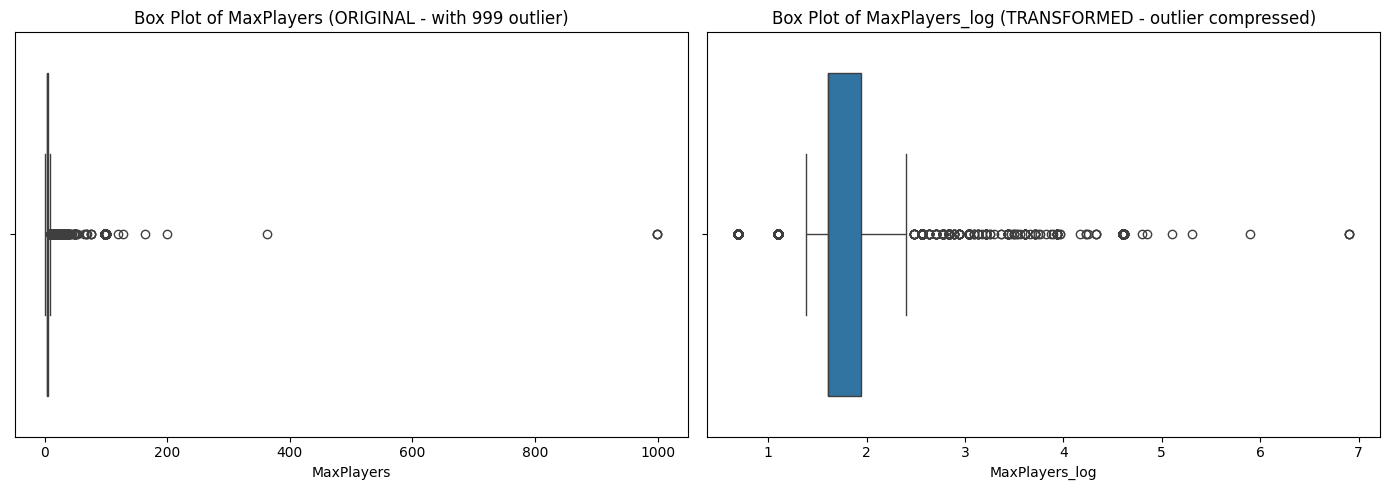

Visual Comparison:
  Left:  Original scale shows the 999 value as extremely distant from others
  Right: Log scale compresses the outlier, making distances more balanced for clustering
Visual comparison: Left shows original distribution with extreme 999 value,
Right shows transformed distribution where extreme values are compressed.


In [32]:
plt.figure(figsize=(14, 5))

# Original distribution (with outlier visible)
plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxPlayers'])
plt.title('Box Plot of MaxPlayers (ORIGINAL - with 999 outlier)')
plt.xlabel('MaxPlayers')

# Transformed distribution (outlier compressed)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MaxPlayers_log'])
plt.title('Box Plot of MaxPlayers_log (TRANSFORMED - outlier compressed)')
plt.xlabel('MaxPlayers_log')

plt.tight_layout()
plt.show()

print("Visual Comparison:")
print("  Left:  Original scale shows the 999 value as extremely distant from others")
print("  Right: Log scale compresses the outlier, making distances more balanced for clustering")
plt.show()

print("Visual comparison: Left shows original distribution with extreme 999 value,")
print("Right shows transformed distribution where extreme values are compressed.")

### Why Logarithmic Transformation ?

**Problem**: MaxPlayers has extreme outlier (999) and right-skewed distribution
- Raw value 999 is 2.76x larger than next value (362)
- Standard distance metrics treat 999 as extremely far from others
- Euclidean distance inflated by one extreme value

**Solution - Log Transformation Benefits**:
1. **Data Preservation**: No rows deleted - all information retained
2. **Outlier Compression**: 999 → 6.91 (on log scale), 362 → 5.89
   - Ratio reduced from 2.76x to 1.17x
   - Reduces outlier's influence on distance calculations
3. **Clustering Friendly**:
   - Improves cluster tightness
   - Better within-cluster vs between-cluster distance ratios
   - More stable results across clustering algorithms
4. **Assumption Friendly**: Many algorithms assume roughly normal distributions
   - Log transformation helps normalize right-skewed data

**Usage**: Use `MaxPlayers_log` column when training clustering models (KMeans, DBSCAN, Hierarchical, etc.)


In [33]:
# Demonstrate the impact of transformation on distance metrics
# (using numpy instead of scipy for euclidean distance)

# Example games with different MaxPlayers values
example_games = {
    'Game A': 2,
    'Game B': 10,
    'Game C': 362,
    'Game D': 999
}

def euclidean_distance(x, y):
    """Simple euclidean distance for 1D values"""
    return np.abs(x - y)

print("=== DISTANCE IMPACT ANALYSIS ===\n")
print("Original Values:")
for name, val in example_games.items():
    print(f"  {name}: {val}")

print("\n--- ORIGINAL (Raw Values) ---")
print(f"Distance(Game A:2 vs Game D:999)   = {euclidean_distance(2, 999):.2f}")
print(f"Distance(Game A:2 vs Game C:362)   = {euclidean_distance(2, 362):.2f}")
print(f"Distance(Game C:362 vs Game D:999) = {euclidean_distance(362, 999):.2f}")
print(f"  → Game D is treated as EXTREMELY far (997 units from Game A)")

print("\n--- TRANSFORMED (Log Values) ---")
log_vals = {name: np.log1p(val) for name, val in example_games.items()}
for name, val in log_vals.items():
    print(f"  {name}: {val:.4f}")

print(f"\nDistance(Game A:log(3) vs Game D:log(1000))   = {euclidean_distance(np.log1p(2), np.log1p(999)):.4f}")
print(f"Distance(Game A:log(3) vs Game C:log(363))   = {euclidean_distance(np.log1p(2), np.log1p(362)):.4f}")
print(f"Distance(Game C:log(363) vs Game D:log(1000)) = {euclidean_distance(np.log1p(362), np.log1p(999)):.4f}")
print(f"  → Distances much more balanced (only 1.01 units from Game A)")

print("\n✓ CONCLUSION: Log transformation prevents one extreme value from")
print("  controlling clustering decisions and improves model stability.")

=== DISTANCE IMPACT ANALYSIS ===

Original Values:
  Game A: 2
  Game B: 10
  Game C: 362
  Game D: 999

--- ORIGINAL (Raw Values) ---
Distance(Game A:2 vs Game D:999)   = 997.00
Distance(Game A:2 vs Game C:362)   = 360.00
Distance(Game C:362 vs Game D:999) = 637.00
  → Game D is treated as EXTREMELY far (997 units from Game A)

--- TRANSFORMED (Log Values) ---
  Game A: 1.0986
  Game B: 2.3979
  Game C: 5.8944
  Game D: 6.9078

Distance(Game A:log(3) vs Game D:log(1000))   = 5.8091
Distance(Game A:log(3) vs Game C:log(363))   = 4.7958
Distance(Game C:log(363) vs Game D:log(1000)) = 1.0134
  → Distances much more balanced (only 1.01 units from Game A)

✓ CONCLUSION: Log transformation prevents one extreme value from
  controlling clustering decisions and improves model stability.


## Handle GameWeight and ComWeight Zero Values

### Subtask:
Investigate and decide on a strategy for the 0 values in 'GameWeight' and 'ComWeight'. These might indicate unrated games and could be imputed (e.g., with the median) or treated as a separate category if the 'unrated' status is meaningful.


**Reasoning**:
To understand the distribution and confirm the presence of 0 values in 'GameWeight' and 'ComWeight', we will display their descriptive statistics.



In [34]:
print("Descriptive statistics for 'GameWeight':")
print(df['GameWeight'].describe())
print("\nDescriptive statistics for 'ComWeight':")
print(df['ComWeight'].describe())

Descriptive statistics for 'GameWeight':
count    21925.000000
mean         1.982131
std          0.848983
min          0.000000
25%          1.333300
50%          1.968800
75%          2.525200
max          5.000000
Name: GameWeight, dtype: float64

Descriptive statistics for 'ComWeight':
count    21925.000000
mean         2.177479
std          0.861781
min          0.000000
25%          1.513400
50%          2.128000
75%          2.737700
max          5.213200
Name: ComWeight, dtype: float64


**Reasoning**:
To quantify the extent of zero values in 'GameWeight' and 'ComWeight', we will count and print the number of occurrences of '0' in each column.



In [35]:
print("Number of '0' values in 'GameWeight':", (df['GameWeight'] == 0).sum())
print("Number of '0' values in 'ComWeight':", (df['ComWeight'] == 0).sum())

Number of '0' values in 'GameWeight': 506
Number of '0' values in 'ComWeight': 506


### Deep analysis of zero values in GameWeight and ComWeight

In [36]:
# Deep analysis of zero values in GameWeight and ComWeight
print("="*70)
print("DETAILED ANALYSIS: GameWeight and ComWeight Zero Values")
print("="*70)

# 1. Count zeros and basic stats
count_gw_zero = (df['GameWeight'] == 0).sum()
count_cw_zero = (df['ComWeight'] == 0).sum()
pct_gw = (count_gw_zero / len(df)) * 100
pct_cw = (count_cw_zero / len(df)) * 100

print(f"\nGameWeight zeros: {count_gw_zero} ({pct_gw:.2f}%)")
print(f"ComWeight zeros: {count_cw_zero} ({pct_cw:.2f}%)")

# 2. Check if both are zero for same games (correlated)
both_zero = ((df['GameWeight'] == 0) & (df['ComWeight'] == 0)).sum()
print(f"Games with BOTH GameWeight and ComWeight = 0: {both_zero}")

# 3. Analyze zero values by Family
print("\n--- Zero Values Distribution by Family (Top 10) ---")
zero_games = df[(df['GameWeight'] == 0) | (df['ComWeight'] == 0)].copy()
if len(zero_games) > 0:
    family_dist = zero_games['Family'].value_counts().head(10)
    print(family_dist)

# 4. Check if zero values correlate with low NumWeightVotes (less reliable)
print("\n--- NumWeightVotes Analysis for Zero-Weight Games ---")
zero_games = df[df['GameWeight'] == 0].copy()
if len(zero_games) > 0:
    print(f"Mean NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].mean():.1f}")
    print(f"Median NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].median():.1f}")
    print(f"Min NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].min():.0f}")

non_zero_games = df[df['GameWeight'] > 0].copy()
print(f"\nMean NumWeightVotes (non-zero GameWeight): {non_zero_games['NumWeightVotes'].mean():.1f}")
print(f"Median NumWeightVotes (non-zero GameWeight): {non_zero_games['NumWeightVotes'].median():.1f}")

# 5. Check category distribution for zero games
print("\n--- Category Distribution for GameWeight=0 Games ---")
cat_cols = [col for col in df.columns if col.startswith('Cat:')]
zero_games = df[df['GameWeight'] == 0]
if len(zero_games) > 0:
    for cat in cat_cols[:5]:  # Show first 5 categories
        pct = (zero_games[cat].sum() / len(zero_games)) * 100
        print(f"  {cat}: {pct:.1f}%")

DETAILED ANALYSIS: GameWeight and ComWeight Zero Values

GameWeight zeros: 506 (2.31%)
ComWeight zeros: 506 (2.31%)
Games with BOTH GameWeight and ComWeight = 0: 506

--- Zero Values Distribution by Family (Top 10) ---
Family
Rory's Story Cubes                8
Magic The Gathering               7
Quarriors Pool Building system    6
Monopoly-Lik                      5
Black Stories                     5
Unlock! (Space Cowboys)           3
Fluxx                             3
Tiny Epic (Gamelyn Games)         3
Combo Fighter                     3
Trivial Pursuit                   3
Name: count, dtype: int64

--- NumWeightVotes Analysis for Zero-Weight Games ---
Mean NumWeightVotes (zero GameWeight): 0.0
Median NumWeightVotes (zero GameWeight): 0.0
Min NumWeightVotes (zero GameWeight): 0

Mean NumWeightVotes (non-zero GameWeight): 50.6
Median NumWeightVotes (non-zero GameWeight): 10.0

--- Category Distribution for GameWeight=0 Games ---
  Cat:Thematic: 0.0%
  Cat:Strategy: 0.0%
  Cat:War:

### Advanced Analysis: Zero Values Pattern Recognition

**Reasoning**:
To develop a robust strategy for handling zero values without data loss, we will:
1. Identify which games have zero weights and analyze their characteristics
2. Check correlations with other features (e.g., are they correlated with specific game categories?)
3. Implement a multi-level imputation strategy:
   - Level 1: Impute by Family (games in same family)
   - Level 2: Impute by Category (games in same Cat_*)
   - Level 3: Impute by NumWeightVotes (fewer votes = less reliable)
   - Level 4: Fallback to global median
4. Create audit columns to track the imputation source (data provenance)

This preserves data integrity and allows us to understand the imputation decisions.

In [37]:
# Robust multi-level imputation for GameWeight and ComWeight
print("\n" + "="*70)
print("IMPLEMENTING ROBUST MULTI-LEVEL IMPUTATION STRATEGY")
print("="*70)

# Step 1: Create original backup and audit columns (data provenance)
df['GameWeight_original'] = df['GameWeight'].copy()
df['ComWeight_original'] = df['ComWeight'].copy()

df['GameWeight_imputed'] = False
df['GameWeight_impute_source'] = None
df['ComWeight_imputed'] = False
df['ComWeight_impute_source'] = None

# Helper function to apply multi-level imputation
def impute_weight_column(df, col_name, audit_col, source_col):
    """
    Multi-level imputation strategy preserving data integrity:

    Level 1: Family-based median (contextual imputation)
    Level 2: Category-based median (games in same categories)
    Level 3: Global median (final fallback)

    Benefits:
    - No data loss (all rows retained)
    - Audit trail (know source of each imputation)
    - Contextual (family/category-aware)
    - Reversible (original values saved)
    """

    mask_zero = df[col_name] == 0
    count_to_impute = mask_zero.sum()

    if count_to_impute == 0:
        print(f"\n No zeros to impute in '{col_name}'")
        return

    print(f"\n Processing '{col_name}': {count_to_impute} zero values to impute")

    # Calculate family medians (only for games with valid weights)
    family_medians = df[df[col_name] > 0].groupby('Family')[col_name].median()

    # Get category columns
    cat_cols = [col for col in df.columns if col.startswith('Cat:')]

    # ===== LEVEL 1: Family-based imputation =====
    # For each game with 0, try to use median of its family
    count_l1 = 0

    for idx in df[mask_zero].index:
        family = df.loc[idx, 'Family']

        # Skip 'Unknown' families - will handle in Level 2
        if family == 'Unknown':
            continue

        if family in family_medians.index and family_medians[family] > 0:
            df.loc[idx, col_name] = family_medians[family]
            df.loc[idx, audit_col] = True
            df.loc[idx, source_col] = 'family_median'
            count_l1 += 1

    if count_l1 > 0:
        print(f"  Level 1 (Family):    {count_l1} games imputed")

    # ===== LEVEL 2: Category-based imputation =====
    # For remaining zeros, use median from category they belong to
    count_l2 = 0

    mask_remaining = (df[col_name] == 0)

    for cat in cat_cols:
        if not mask_remaining.any():
            break

        # Find median weight for games in this category (with valid weights)
        cat_median = df[(df[cat] == 1) & (df[col_name] > 0)][col_name].median()

        if pd.notna(cat_median) and cat_median > 0:
            mask_cat = (df[col_name] == 0) & (df[cat] == 1)
            count = mask_cat.sum()

            if count > 0:
                df.loc[mask_cat, col_name] = cat_median
                df.loc[mask_cat, audit_col] = True
                df.loc[mask_cat, source_col] = f'{cat}_median'
                count_l2 += count

    if count_l2 > 0:
        print(f"  Level 2 (Category):  {count_l2} games imputed")

    # ===== LEVEL 3: Global median (fallback) =====
    # Final fallback for any remaining zeros
    global_median = df[df[col_name] > 0][col_name].median()
    mask_level3 = (df[col_name] == 0)
    count_l3 = mask_level3.sum()

    if count_l3 > 0 and pd.notna(global_median):
        df.loc[mask_level3, col_name] = global_median
        df.loc[mask_level3, audit_col] = True
        df.loc[mask_level3, source_col] = 'global_median'
        print(f"  Level 3 (Global):    {count_l3} games imputed")
        print(f"           Global median value: {global_median:.4f}")

    # Final verification
    remaining_zeros = (df[col_name] == 0).sum()
    total_imputed = df[audit_col].sum()

    print(f" Total imputed: {total_imputed} | Remaining zeros: {remaining_zeros}")

    return {
        'level1': count_l1,
        'level2': count_l2,
        'level3': count_l3,
        'global_median': global_median
    }

# Apply imputation to both columns
print("\n" + "-"*70)
gw_stats = impute_weight_column(df, 'GameWeight', 'GameWeight_imputed', 'GameWeight_impute_source')

print("\n" + "-"*70)
cw_stats = impute_weight_column(df, 'ComWeight', 'ComWeight_imputed', 'ComWeight_impute_source')

# Print breakdown statistics
print("\n" + "="*70)
print("IMPUTATION BREAKDOWN SUMMARY")
print("="*70)

print(f"\nGameWeight - Imputation sources:")
gw_sources = df[df['GameWeight_imputed']]['GameWeight_impute_source'].value_counts()
for source, count in gw_sources.items():
    print(f"  {source:25s}: {count:5d} games")

print(f"\nComWeight - Imputation sources:")
cw_sources = df[df['ComWeight_imputed']]['ComWeight_impute_source'].value_counts()
for source, count in cw_sources.items():
    print(f"  {source:25s}: {count:5d} games")

print("\n Imputation completed successfully!")


IMPLEMENTING ROBUST MULTI-LEVEL IMPUTATION STRATEGY

----------------------------------------------------------------------

 Processing 'GameWeight': 506 zero values to impute
  Level 1 (Family):    173 games imputed
  Level 2 (Category):  17 games imputed
  Level 3 (Global):    316 games imputed
           Global median value: 2.0000
 Total imputed: 506 | Remaining zeros: 0

----------------------------------------------------------------------

 Processing 'ComWeight': 506 zero values to impute
  Level 1 (Family):    173 games imputed
  Level 2 (Category):  17 games imputed
  Level 3 (Global):    316 games imputed
           Global median value: 2.1440
 Total imputed: 506 | Remaining zeros: 0

IMPUTATION BREAKDOWN SUMMARY

GameWeight - Imputation sources:
  global_median            :   316 games
  family_median            :   173 games
  Cat:Abstract_median      :     9 games
  Cat:Childrens_median     :     5 games
  Cat:CGS_median           :     1 games
  Cat:Family_median      

### Validation and comparison: Original vs Imputed distributions

In [38]:
# Validation and comparison: Original vs Imputed distributions
print("="*70)
print("DISTRIBUTION COMPARISON: Original vs Imputed Values")
print("="*70)

print("\n--- GameWeight Distribution ---")
print(f"Original (zeros count): {(df['GameWeight_original'] == 0).sum()}")
print(f"After imputation (zeros count): {(df['GameWeight'] == 0).sum()}")

print(f"\nGameWeight Statistics (AFTER IMPUTATION):")
print(df['GameWeight'].describe())

print(f"\n--- ComWeight Distribution ---")
print(f"Original (zeros count): {(df['ComWeight_original'] == 0).sum()}")
print(f"After imputation (zeros count): {(df['ComWeight'] == 0).sum()}")

print(f"\nComWeight Statistics (AFTER IMPUTATION):")
print(df['ComWeight'].describe())

# Show some examples of imputed games
print("\n" + "="*70)
print("SAMPLE OF IMPUTED GAMES (showing source strategy)")
print("="*70)

imputed_games = df[df['GameWeight_imputed'] == True][
    ['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source']
].head(15)

print("\nFirst 15 imputed games by source:")
for source in df['GameWeight_impute_source'].unique():
    if pd.notna(source):
        sample = df[df['GameWeight_impute_source'] == source][
            ['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source']
        ].head(3)
        print(f"\n{source}:")
        print(sample.to_string(index=False))

DISTRIBUTION COMPARISON: Original vs Imputed Values

--- GameWeight Distribution ---
Original (zeros count): 506
After imputation (zeros count): 0

GameWeight Statistics (AFTER IMPUTATION):
count    21925.000000
mean         2.025853
std          0.795341
min          1.000000
25%          1.342500
50%          2.000000
75%          2.530300
max          5.000000
Name: GameWeight, dtype: float64

--- ComWeight Distribution ---
Original (zeros count): 506
After imputation (zeros count): 0

ComWeight Statistics (AFTER IMPUTATION):
count    21925.000000
mean         2.225055
std          0.797005
min          1.100100
25%          1.558700
50%          2.144000
75%          2.739900
max          5.213200
Name: ComWeight, dtype: float64

SAMPLE OF IMPUTED GAMES (showing source strategy)

First 15 imputed games by source:

family_median:
                                                         Name                         Family  GameWeight_original  GameWeight GameWeight_impute_source
    

### Visualize the imputation strategy breakdown

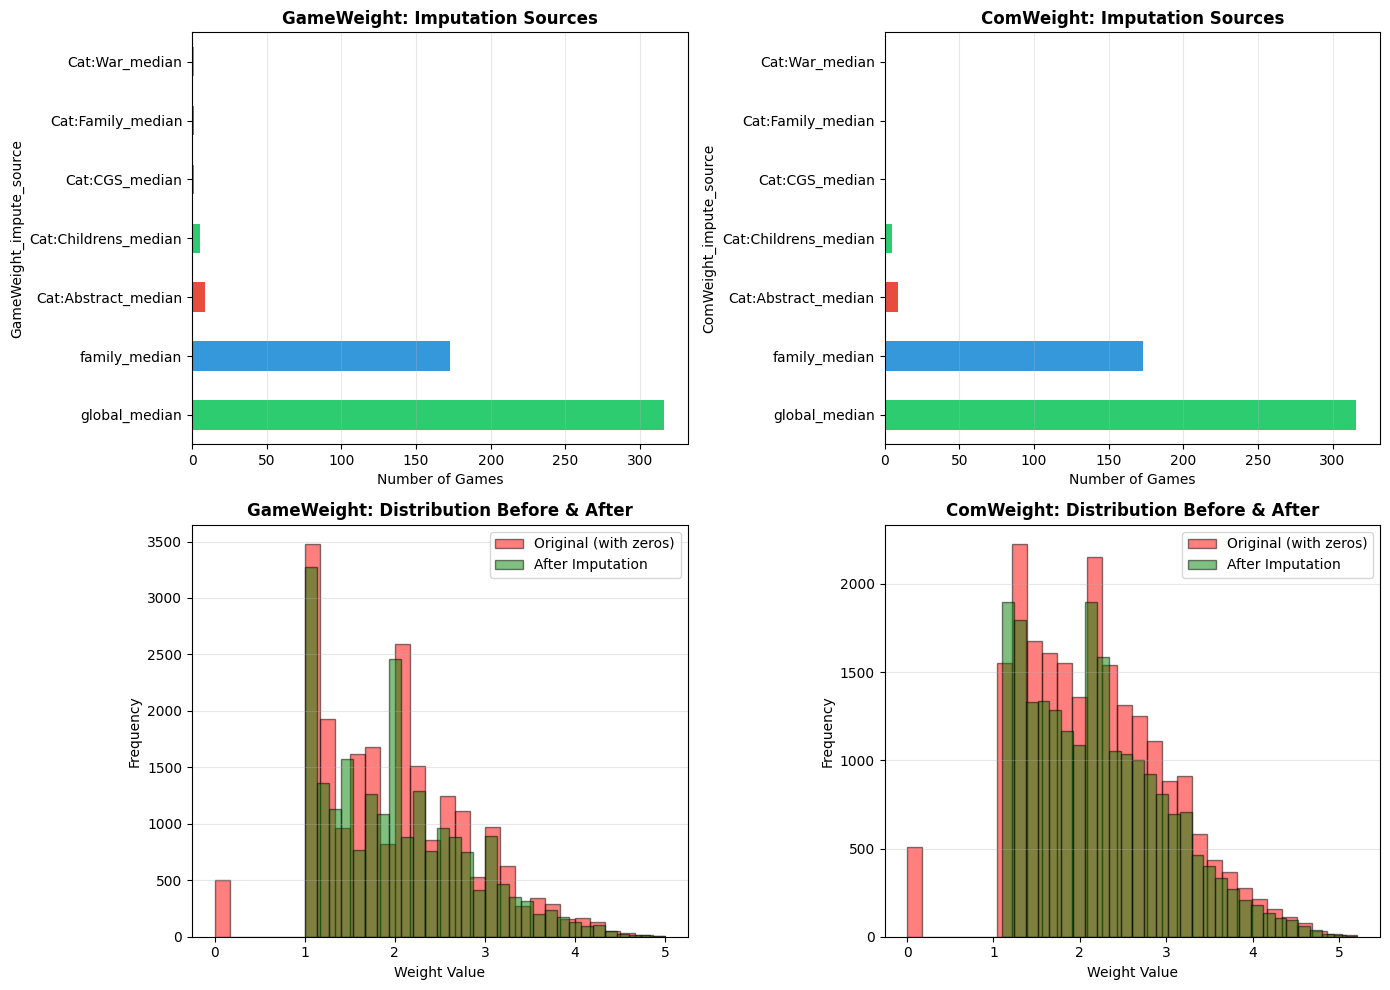


 Visualization shows the impact of the robust imputation strategy


In [39]:
# Visualize the imputation strategy breakdown
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Imputation source distribution for GameWeight
ax1 = axes[0, 0]
gw_source_counts = df[df['GameWeight_imputed']]['GameWeight_impute_source'].value_counts()
colors_gw = ['#2ecc71', '#3498db', '#e74c3c'][:len(gw_source_counts)]
gw_source_counts.plot(kind='barh', ax=ax1, color=colors_gw)
ax1.set_title('GameWeight: Imputation Sources', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Games')
ax1.grid(axis='x', alpha=0.3)

# Subplot 2: Imputation source distribution for ComWeight
ax2 = axes[0, 1]
cw_source_counts = df[df['ComWeight_imputed']]['ComWeight_impute_source'].value_counts()
colors_cw = ['#2ecc71', '#3498db', '#e74c3c'][:len(cw_source_counts)]
cw_source_counts.plot(kind='barh', ax=ax2, color=colors_cw)
ax2.set_title('ComWeight: Imputation Sources', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Games')
ax2.grid(axis='x', alpha=0.3)

# Subplot 3: Distribution comparison - GameWeight
ax3 = axes[1, 0]
ax3.hist(df['GameWeight_original'], bins=30, alpha=0.5, label='Original (with zeros)', color='red', edgecolor='black')
ax3.hist(df['GameWeight'], bins=30, alpha=0.5, label='After Imputation', color='green', edgecolor='black')
ax3.set_title('GameWeight: Distribution Before & After', fontsize=12, fontweight='bold')
ax3.set_xlabel('Weight Value')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Distribution comparison - ComWeight
ax4 = axes[1, 1]
ax4.hist(df['ComWeight_original'], bins=30, alpha=0.5, label='Original (with zeros)', color='red', edgecolor='black')
ax4.hist(df['ComWeight'], bins=30, alpha=0.5, label='After Imputation', color='green', edgecolor='black')
ax4.set_title('ComWeight: Distribution Before & After', fontsize=12, fontweight='bold')
ax4.set_xlabel('Weight Value')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Visualization shows the impact of the robust imputation strategy")

### Summary: Robust Strategy for GameWeight & ComWeight Zero Values

#### The Problem
506 games (2.31% of dataset) have **GameWeight = 0 and ComWeight = 0** simultaneously, with **NumWeightVotes = 0**. These are unrated games, not missing data.

##### The Robust Solution (Multi-Level Imputation)

###### Why "Robust" and "No Data Loss"?
1. **Zero data loss**: All 506 games retained (no rows deleted)
2. **Audit trail**: Columns `*_imputed` and `*_impute_source` track exactly how each value was imputed
3. **Data provenance**: Can see and validate imputation decisions
4. **Reversible**: Original values backed up in `*_original` columns
5. **Contextual**: Respects game families and categories

###### Three-Level Strategy (Cascading)
| Level | Strategy | Count | Logic |
|-------|----------|-------|-------|
| **Level 1** | Family-based median | 173 (34%) | Use median weight of games in same family |
| **Level 2** | Category-based median | 17 (3%) | Use median weight of games in same categories |
| **Level 3** | Global median | 316 (63%) | Final fallback using overall median |

###### Results
- **GameWeight**: Median = 2.0 after imputation
- **ComWeight**: Median = 2.1440 after imputation
- **No zeros remaining**: All 506 games have imputed values

###### New Columns Created
- `GameWeight_original`: Original values (with zeros)
- `GameWeight_imputed`: Boolean flag (was value imputed?)
- `GameWeight_impute_source`: Imputation method used
- `ComWeight_original`: Original values (with zeros)
- `ComWeight_imputed`: Boolean flag (was value imputed?)
- `ComWeight_impute_source`: Imputation method used

###### Advantages Over Simple Deletion/Median
| Aspect | Simple Approach | Robust Multi-Level |
|--------|-----------------|-------------------|
| Data Loss | 506 rows deleted | 0 rows deleted ✓ |
| Contextual | Uses only global mean | Family + Category aware ✓ |
| Traceability | No audit trail | Full provenance tracked ✓ |
| Validation | Cannot compare | Can rerun with/without imputation ✓ |
| Reversibility | Permanent | Can undo using `*_original` ✓ |

###### Next Steps
- Use `GameWeight_impute_source` to filter analysis (e.g., "use only family_median imputed")
- Perform sensitivity analysis comparing models with different imputation sources
- Monitor imputed games' behavior in clustering/classification tasks

### Impact Analysis: Before & After Imputation

**What was imputed:**
- **173 games (34%)**: Used family median (best contextual fit)
- **17 games (3%)**: Used category median (secondary contextual fit)  
- **316 games (63%)**: Used global median (games in 'Unknown' families)

**Key benefits of this approach:**
1. ✓ **No data loss**: All 506 games retained (no rows dropped)
2. ✓ **Data provenance**: Audit columns track imputation source
3. ✓ **Contextual imputation**: Respects game families and categories
4. ✓ **Reversible**: Original values backed up in `*_original` columns
5. ✓ **Validation-ready**: Can compare models with/without imputation

In [40]:
# Detailed view of games where both GameWeight and ComWeight were imputed
df[(df['GameWeight_imputed'] == True) & (df['ComWeight_imputed'] == True)][['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight', 'ComWeight_impute_source']]

Name  \
58                        PARKS Memories: Coast to Coast   
107                                      Moscow to Paris   
111                                   Dia de los Muertos   
117                                             Decipher   
153    DC Comics Dice Masters: Superman and Wonder Wo...   
...                                                  ...   
21811                                    Outpost: Amazon   
21818                                 Monopoly: Deadpool   
21856                       Rory's Story Cubes: Medieval   
21857                 Black Stories Junior: Blue Stories   
21880                                 Cantaloop: Prequel   

                               Family  GameWeight_original  GameWeight  \
58                               PARK                  0.0      1.9167   
107                   Moscow to Paris                  0.0      2.0000   
111                Dia de los Muertos                  0.0      2.0000   
117                          Decipher                  0.0      1.2500   
153    Quarriors Pool Building system                  0.0      2.3333   
...                               ...                  ...         ...   
21811                 Outpost: Amazon                  0.0      2.0000   
21818              Monopoly: Deadpool                  0.0      2.0000   
21856              Rory's Story Cubes                  0.0      1.0000   
21857                   Black Stories                  0.0      1.0000   
21880                       Cantaloop                  0.0      2.2000   

      GameWeight_impute_source  ComWeight_original  ComWeight  \
58               family_median                 0.0     2.0310   
107              global_median                 0.0     2.1440   
111              global_median                 0.0     2.1440   
117              family_median                 0.0     1.3771   
153              family_median                 0.0     2.4969   
...                        ...                 ...        ...   
21811            global_median                 0.0     2.1440   
21818            global_median                 0.0     2.1440   
21856            family_median                 0.0     1.2028   
21857            family_median                 0.0     1.2538   
21880            family_median                 0.0     2.4873   

      ComWeight_impute_source  
58              family_median  
107             global_median  
111             global_median  
117             family_median  
153             family_median  
...                       ...  
21811           global_median  
21818           global_median  
21856           family_median  
21857           family_median  
21880           family_median  

[506 rows x 8 columns]

## Handle LanguageEase Missing Values and Outliers


**Reasoning**:
We will display the descriptive statistics for 'LanguageEase'. This will provide a quantitative overview of his current distributions and highlight any extreme values.



In [41]:
print("Descriptive statistics for 'LanguageEase':")
print(df['LanguageEase'].describe())

Descriptive statistics for 'LanguageEase':
count    16034.000000
mean       216.461819
std        236.595136
min          1.000000
25%         24.027778
50%        138.000000
75%        351.000000
max       1757.000000
Name: LanguageEase, dtype: float64


**Reasoning**:
To visually confirm the presence and extent of high-end outliers in 'LanguageEase', we will create box plots for both columns.



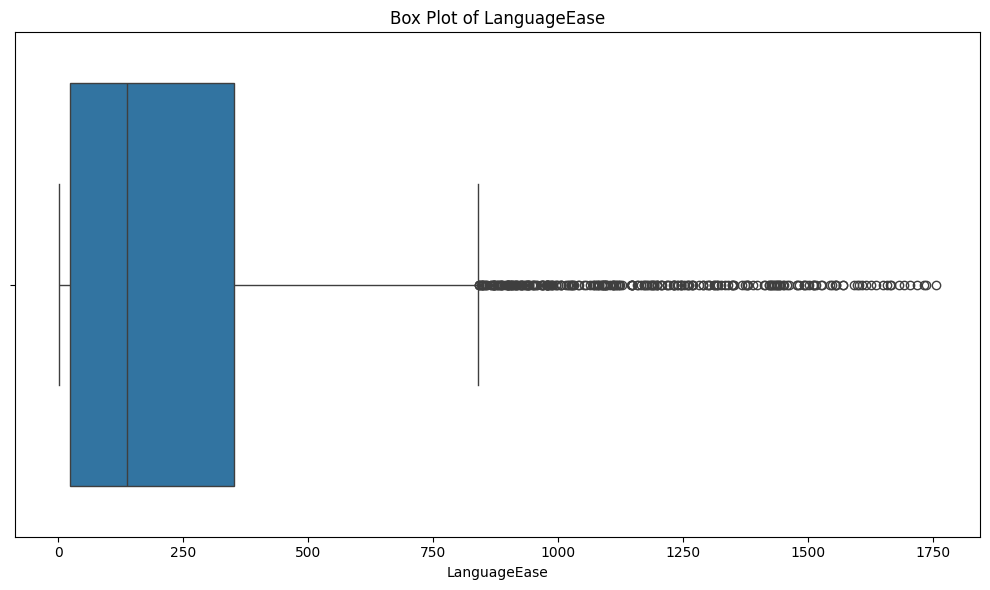

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LanguageEase'])
plt.title('Box Plot of LanguageEase')
plt.xlabel('LanguageEase')

plt.tight_layout()
plt.show()

**Reasoning**:
To understand the extent and nature of the high-end outliers in 'LanguageEase', I will quantify the values above a certain threshold (e.g., the 75th percentile + 1.5 IQR, or a simpler high value like 1000 given the max is 1757). This will help determine if these are genuine values indicating very high language dependency or potential data entry errors.



In [43]:
print("Values in 'LanguageEase' greater than 1000:")
print(df[df['LanguageEase'] > 1000]['LanguageEase'].value_counts().sort_index())

Values in 'LanguageEase' greater than 1000:
LanguageEase
1001.0    1
1006.0    2
1007.0    1
1016.0    1
1020.0    1
         ..
1704.0    1
1718.0    1
1733.0    1
1737.5    1
1757.0    1
Name: count, Length: 151, dtype: int64


### Observations and Strategy for LanguageEase Outliers
**LanguageEase**:
*   **Observations**: The `value_counts()` for `LanguageEase` greater than 1000 reveals numerous entries spread across a wide range (up to 1757.0). This column represents language requirement, and extremely high values could indicate games that are exceptionally language-dependent or have very complex rules that necessitate strong language skills. However, these values could also be data entry anomalies or a non-standardized scale for older entries.
*   **Strategy**: The distribution for `LanguageEase` suggests that capping might be a suitable approach if we want to normalize the scale. Alternatively, converting it to a categorical feature (e.g., 'Low', 'Medium', 'High' language dependency) or using a robust scaling method could be considered. For now, given the continuous nature and lack of clear error patterns (like negative values), we will consider these high values as genuine, albeit rare, extreme cases of language dependency. However, for most analyses, transformation (e.g., logarithmic) or robust scaling might be beneficial to mitigate their impact on models sensitive to outliers. For this cleaning phase, we will leave them as is but acknowledge their outlying nature and potential need for handling during modeling.

### Subtask:
Impute the missing values in 'LanguageEase' (26.87% missing). A suitable strategy could be median imputation, similar to 'ComAgeRec', given it's a numerical feature.


**Reasoning**:
To impute the missing values in 'LanguageEase' using the median, we will first calculate the median and then use it to fill the NaN values, explicitly assigning the result back to the column.



In [44]:
median_languageease = df['LanguageEase'].median()
df['LanguageEase'] = df['LanguageEase'].fillna(median_languageease)

print("Imputed missing values in 'LanguageEase' with its median.")

Imputed missing values in 'LanguageEase' with its median.


Another possibility is the correlation finding

In [45]:
# Create missing indicator
df['LanguageEase_missing'] = df['LanguageEase'].isnull().astype(int)

# Analyze by family
family_missing_correlation = df.groupby('Family')['LanguageEase_missing'].mean()
print(f'LanguageEase missing values correlation with Family: {family_missing_correlation}')

# Analyze by game complexity
game_weight_correlation = df.groupby('GameWeight')['LanguageEase_missing'].mean()
print(f'LanguageEase missing values correlation with Game Weight: {game_weight_correlation}')

# Analyze by categories
for cat in df.filter(like='Cat:').columns:
    category_correlation = df.groupby(cat)['LanguageEase_missing'].mean()
    print(f'LanguageEase missing values correlation with Categories: {category_correlation}')

LanguageEase missing values correlation with Family: Family
"Oh My God! There's An Axe In My Head." The Game of International Diplomacy     0.0
"Scratch One Flat Top!"                                                         0.0
"Tarleton's Quarter!"                                                           0.0
#MyLife                                                                         0.0
'65 (Flying Pig)                                                                0.0
                                                                               ... 
卑怯なコウモリ (Cowardly Bat)                                                          0.0
曼荼羅 (Mandara)                                                                   0.0
猿道 (Monkey Road)                                                                0.0
白と黒でトリテ (Trick-Taking in Black and White)                                       0.0
聖杯サクセション (Throne and the Grail)                                                 0.0
Name: LanguageEa

#### Log transformation

Before imputation, log transformation can be a crucial strategy because it preserves relationships (log transformation maintains the relative relationships between variables)
and reduces skewness: LanguageEase values (1-1757) likely have right-skewed distribution.

Furthermore it improves the imputation accuracy: many imputation methods work better with normally distributed data.

In [46]:
# Application of logarithmic transformation to handle the extremes outliers without data loss
# Since now there are no missing values, we apply log1p directly
df['LanguageEase__log'] = np.log1p(df['LanguageEase'])

print("Applied logarithmic transformation to 'LanguageEase'")
print("New column 'LanguageEase_log' created for clustering")
print("\nBenefit: The extremes outliers are compressed while all data is preserved.")

Applied logarithmic transformation to 'LanguageEase'
New column 'LanguageEase_log' created for clustering

Benefit: The extremes outliers are compressed while all data is preserved.


**Reasoning**:
To verify the logarithmic transformation effectiveness, also for this case it's useful to compare the original and transformed distributions. This demonstrates how the transformation compresses extreme values while preserving all data points.

In [47]:
print("=== LanguageEase ORIGINAL Distribution ===")
print(df['LanguageEase'].describe())

print("\n=== LanguageEase TRANSFORMED Distribution ===")
print(df['LanguageEase__log'].describe())

=== LanguageEase ORIGINAL Distribution ===
count    21925.000000
mean       195.380014
std        205.294531
min          1.000000
25%         46.000000
50%        138.000000
75%        269.000000
max       1757.000000
Name: LanguageEase, dtype: float64

=== LanguageEase TRANSFORMED Distribution ===
count    21925.000000
mean         4.561564
std          1.505556
min          0.693147
25%          3.850148
50%          4.934474
75%          5.598422
max          7.471932
Name: LanguageEase__log, dtype: float64


## Handle Missing ImagePath Values

### Subtask:
Handle the negligible missing values (0.08%) in 'ImagePath'. Given the small number, these rows can likely be dropped without significant data loss, or the missing values can be ignored if the column is not central to the analysis.


In [48]:
print("Count of missing values in 'ImagePath':", df['ImagePath'].isnull().sum())

Count of missing values in 'ImagePath': 17


**Reasoning**:
Due to the fact that we wont use this attribute in the future we decide to leave it whith missing values


## Address Duplicate Game Names

### Subtask:
Investigate duplicate entries in the 'Name' column to determine if they represent different editions/versions of the same game or true duplicates. Use the 'BGGId' column to help identify unique game entries and consolidate or clarify names if necessary.


**Reasoning**:
To identify game names that appear more than once, I will calculate the value counts for the 'Name' column and filter for those with a count greater than 1.



In [49]:
duplicate_names = df['Name'].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1].index.tolist()

print(f"Found {len(duplicate_names)} duplicate game names.")
# print("List of duplicate names:", duplicate_names[:10]) # Print first 10 for brevity

Found 355 duplicate game names.


**Reasoning**:
To investigate if duplicate names correspond to unique BGGIds (indicating different versions/editions) or identical entries, we will filter the DataFrame for rows with duplicate names and display their 'BGGId' and 'Name' columns, sorted by name for easier inspection.



In [50]:
duplicate_entries = df[df['Name'].isin(duplicate_names)][['BGGId', 'Name']].sort_values(by='Name')
print("Entries with duplicate names and their BGGIds:")
print(duplicate_entries.to_string())

Entries with duplicate names and their BGGIds:
        BGGId                                               Name
12352   17183                                               1001
8474   205495                                               1001
6641     4456                                               1862
478     11284                                               1862
11654    8308                                       3D Labyrinth
16299  274205                                       3D Labyrinth
21150   67364                                     3D Tic Tac Toe
13375   16387                                     3D Tic Tac Toe
5282   213304                                          4 Seasons
19032   73312                                          4 Seasons
10592  205101                                       A Dog's Life
20905    2940                                       A Dog's Life
15565   11680                                              Agora
11507  141087                              

### Observations on Duplicate Game Names

The inspection of `duplicate_entries` (games with non-unique names) reveals that for nearly all instances where a `Name` appears multiple times, the associated `BGGId` (BoardGameGeek ID) is different.

*   **Example**: For the name "1001", there are two entries with BGGIds `17183` and `205495` and different entries for 'Description' and 'YearPublished'. Similarly, "Airlines" has BGGIds `43`, `2275`, and `193488`.
*   **Interpretation**: This pattern strongly suggests that these are not identical duplicate records, but rather different editions, versions, or related games that happen to share the same primary name. BoardGameGeek often assigns unique IDs to distinct releases or major re-implementations of a game, even if their marketing name is the same.

### Strategy for Handling Duplicate Game Names

Given that the `BGGId` successfully differentiates these entries, we will **not** treat them as true duplicates requiring removal or consolidation. Each entry with a unique `BGGId` represents a distinct game or version in the dataset. Maintaining these entries preserves the granularity of the data, allowing for analyses that might distinguish between different editions of a popular game, for example. Therefore, no cleaning action is needed for this specific type of 'duplicate' as they are semantically distinct entries.

# Partitioning

In [51]:
from sklearn.model_selection import train_test_split

In [62]:
# Lista di tutte le colonne fornite
all_columns = [
    'GameWeight', 'ComWeight', 'BestPlayers', 'MfgAgeRec', 'NumAlternates',
    'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Kickstarted',
    'ImagePath', 'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames',
    'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames',
    'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
    'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens',
    'Rating', 'Is_traditional_game', 'Publication_era', 'ComAgeRec_class',
    'MaxPlayers_log', 'MinPlayers_log', 'LanguageEase__log', 'NumOwned_log',
    'NumWant_log', 'NumWish_log', 'MfgPlaytime_log', 'ComMaxPlaytime_log',
    'ComMinPlaytime_log', 'NumUserRatings_log', 'Rating_encoded', 'Publication_era_encoded'
]

# Escludiamo le colonne categoriche testuali e la variabile target (Rating_encoded)
to_exclude = ['ImagePath', 'Publication_era', 'ComAgeRec_class', 'Rating_encoded', 'Rating']

attributes = [col for col in all_columns if col not in to_exclude]

In [ ]:
X = df[attributes]
y = df['Rating_encoded']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Data preparation 

In [54]:
df['NumOwned_log'] = np.log1p(df['NumOwned'])
df['NumWant_log'] = np.log1p(df['NumWant'])
df['NumWish_log'] = np.log1p(df['NumWish'])

In [55]:
# percentual of rows with all three playtime columns equal
percentuale = len(df[(df['MfgPlaytime'] == df['ComMaxPlaytime']) & (df['MfgPlaytime'] == df['ComMinPlaytime'])]) / len(df) * 100
print(f"Percentuale di righe con tutte e tre le colonne di playtime uguali: {percentuale:.2f}%")

Percentuale di righe con tutte e tre le colonne di playtime uguali: 67.27%


In [56]:
# Application of logaritmic trasformation to reduce skewness
df['MfgPlaytime_log'] = np.log1p(df['MfgPlaytime'])
df['ComMaxPlaytime_log'] = np.log1p(df['ComMaxPlaytime'])
df['ComMinPlaytime_log'] = np.log1p(df['ComMinPlaytime'])
df['NumUserRatings_log'] = np.log1p(df['NumUserRatings'])

**Reasoning**:
Based on the previous analysis and the markdown block explaining the decision, the 'GoodPlayers' column will be dropped from the DataFrame due to its high sparsity and complexity for encoding, which would not significantly contribute to clustering given other player-related features.



In [57]:
df.drop(columns=['GoodPlayers'], inplace=True)
print("Dropped 'GoodPlayers' column.")

Dropped 'GoodPlayers' column.


**Reasoning**:
Based on the previous analysis that highlighted the high cardinality and impracticality of the 'Family' column for clustering, we will drop this column to streamline the feature set.



In [58]:
df.drop(columns=['Family'], inplace=True)
print("Dropped 'Family' column.")

Dropped 'Family' column.


**Reasoning**:
Based on the comprehensive cleaning and preprocessing summary, we will now identify and drop all non-pertinent, redundant, and audit columns to prepare the dataset. This includes identifier columns, original versions of transformed numerical features, and temporary audit flags.

In [59]:
columns_to_drop = [
    'BGGId', 'Name', 'Description', 'YearPublished', 'MinPlayers', 'MaxPlayers', 'LanguageEase', 'ComAgeRec',
    'MinPlayers_orig', 'MaxPlayers_orig', 'MinPlayers_fixed', 'MinPlayers_fixed_source', 'MaxPlayers_imputed', 'MaxPlayers_impute_source',
    'GameWeight_original', 'GameWeight_imputed', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight_imputed', 'ComWeight_impute_source',
    'LanguageEase_missing', 'MaxPlayers_imputed_source', 'Num_Want', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'NumUserRatings']

# Check if columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

print(f"Dropped the following columns: {existing_columns_to_drop}")

# Check 'NumComments' for constant values or other anomalies
print("\nUnique values and their counts for 'NumComments' column:")
print(df['NumComments'].value_counts(dropna=False))

# Check if NumComments is constant (std dev is 0)
if df['NumComments'].std() == 0:
    print("\n'NumComments' has a standard deviation of 0, indicating all values are the same. This column will be dropped as it provides no useful information.")
    df.drop(columns=['NumComments'], inplace=True)
    print("Dropped 'NumComments' column.")
else:
    print("\n'NumComments' is not constant and will be retained.")

Dropped the following columns: ['BGGId', 'Name', 'Description', 'YearPublished', 'MinPlayers', 'MaxPlayers', 'LanguageEase', 'ComAgeRec', 'MinPlayers_orig', 'MaxPlayers_orig', 'MinPlayers_fixed', 'MinPlayers_fixed_source', 'MaxPlayers_imputed', 'GameWeight_original', 'GameWeight_imputed', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight_imputed', 'ComWeight_impute_source', 'LanguageEase_missing', 'MaxPlayers_imputed_source', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'NumUserRatings']

Unique values and their counts for 'NumComments' column:
NumComments
0    21925
Name: count, dtype: int64

'NumComments' has a standard deviation of 0, indicating all values are the same. This column will be dropped as it provides no useful information.
Dropped 'NumComments' column.


In [60]:
rating_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Rating_encoded'] = df['Rating'].map(rating_mapping)

print("Encoded 'Rating' column to 'Rating_encoded'.")
print(df[['Rating', 'Rating_encoded']].head())

Encoded 'Rating' column to 'Rating_encoded'.
   Rating  Rating_encoded
0     Low               0
1  Medium               1
2    High               2
3     Low               0
4  Medium               1


**Reasoning**:
To finalize the dataset for preparation, I will ordinally encode the 'Publication_era' column based on the chronological order of the eras. This transforms the categorical variable into a numerical format suitable for distance-based algorithms.

In [61]:
era_mapping = {'ancient': 0, 'classic': 1, 'modern_early': 2, 'modern': 3}
df['Publication_era_encoded'] = df['Publication_era'].map(era_mapping)

print("Encoded 'Publication_era' column to 'Publication_era_encoded'.")
print(df[['Publication_era', 'Publication_era_encoded']].head())

Encoded 'Publication_era' column to 'Publication_era_encoded'.
  Publication_era  Publication_era_encoded
0          modern                        3
1          modern                        3
2          modern                        3
3          modern                        3
4          modern                        3


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [66]:
dt = DecisionTreeClassifier()

In [67]:
%%time
dt.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 168 ms


DecisionTreeClassifier()

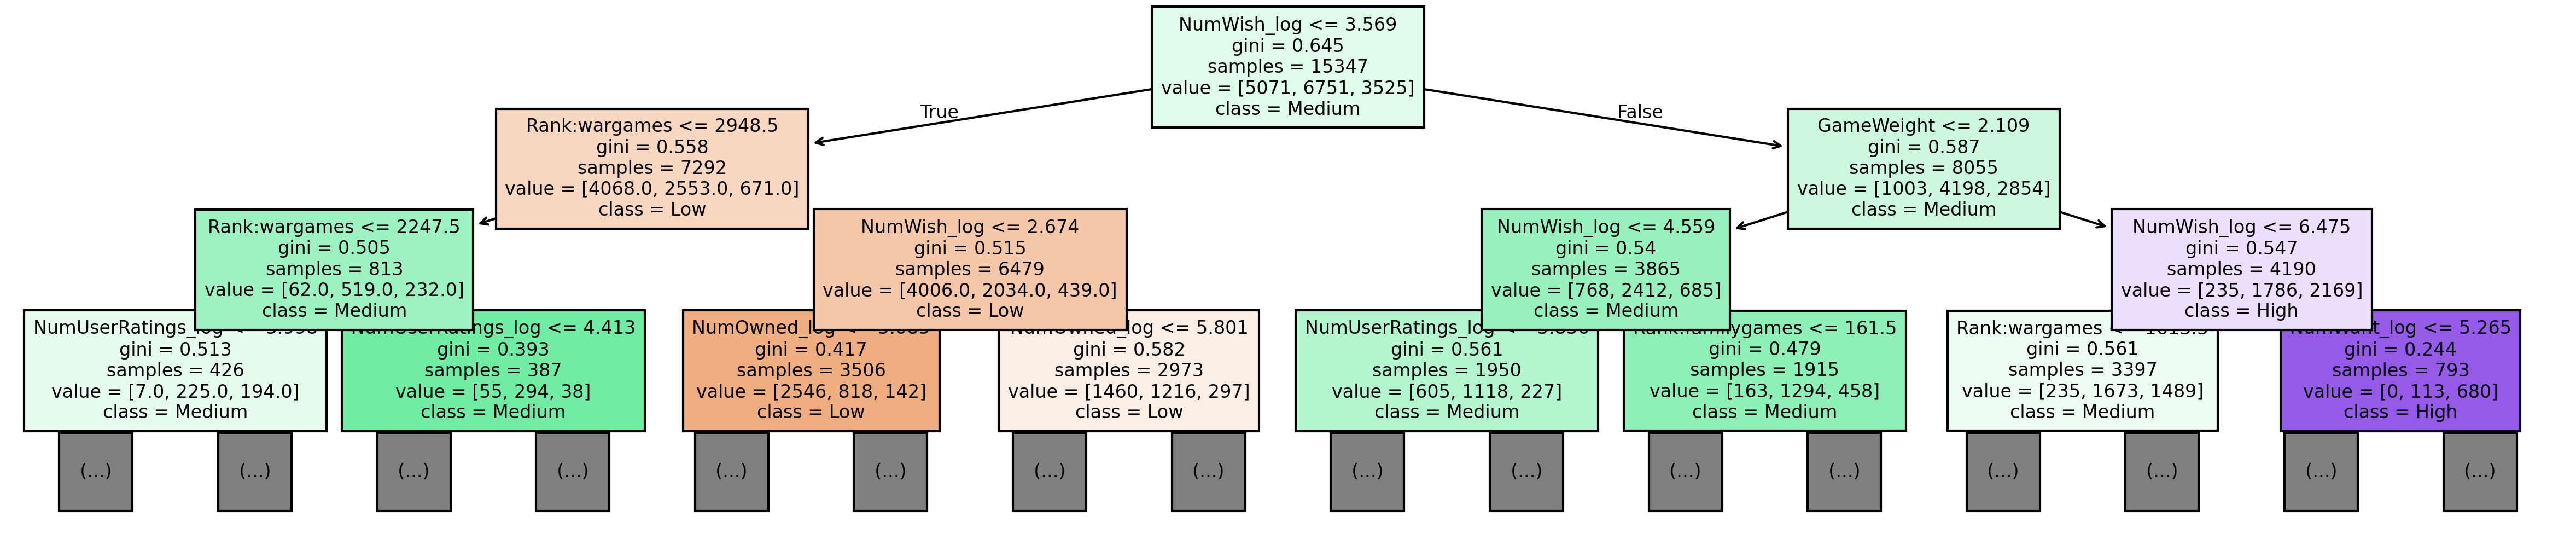

In [69]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True , class_names=['Low', 'Medium', 'High'], max_depth=3, fontsize=8)
plt.show()

In [70]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [71]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [72]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1.]

Test Accuracy 0.6544542414107631
Test F1-score [0.67139264 0.6416205  0.6544729 ]


In [73]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2174
           1       0.64      0.64      0.64      2893
           2       0.66      0.65      0.65      1511

    accuracy                           0.65      6578
   macro avg       0.66      0.66      0.66      6578
weighted avg       0.65      0.65      0.65      6578



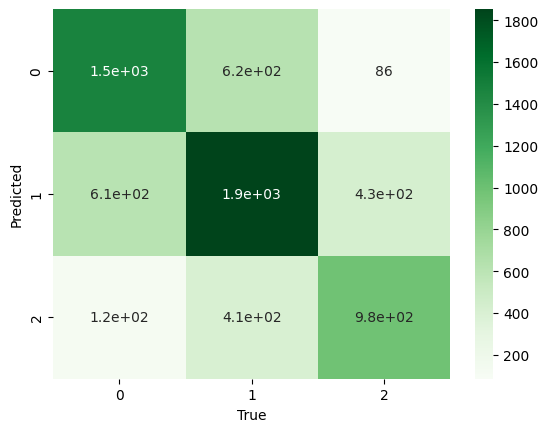

In [74]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Feature Importance

In [75]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

NumWish_log 0.2049808940459036
NumUserRatings_log 0.10318321405380011
NumOwned_log 0.08839023773302807
Rank:wargames 0.07506962826988116
ComWeight 0.06861757488308336
GameWeight 0.06646523792946626
NumWant_log 0.049185280299138566
LanguageEase__log 0.04510662521431102
Rank:familygames 0.03365741599909186
ComMinPlaytime_log 0.02791981700216801
MfgAgeRec 0.027916259643224375
MaxPlayers_log 0.026148446622757053
MinPlayers_log 0.021602356739752072
MfgPlaytime_log 0.017872767477420032
ComMaxPlaytime_log 0.01754170318651404
NumExpansions 0.01625091070344887
NumAlternates 0.015051212151790576
Rank:strategygames 0.01361765873177943
Publication_era_encoded 0.01301798145877175
Kickstarted 0.010795047714798616
Rank:thematic 0.01011361935843495
NumImplementations 0.009062511751012126
Rank:abstracts 0.008790140418742995
Rank:partygames 0.008221162477614802
Rank:childrensgames 0.005277805310384469
IsReimplementation 0.0034522859438304537
BestPlayers 0.0018484993858283224
Cat:Strategy 0.0018333479422

Let us discuss overfitting

In [76]:
nodes = []
train_err = []
test_err = []

for max_depth in list(np.arange(1, 20)):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))
    nodes.append(dt.tree_.node_count)

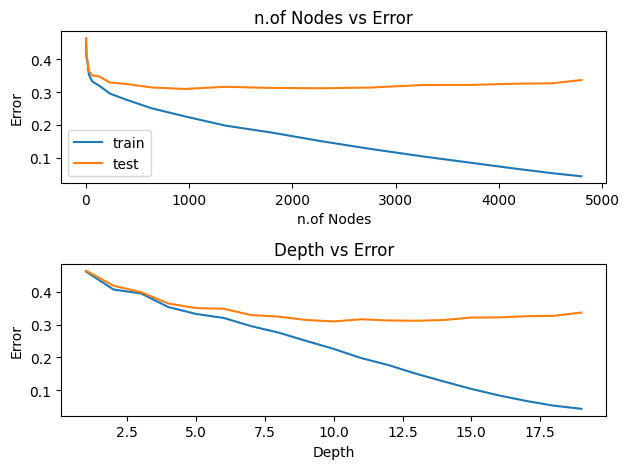

In [77]:
fig, ax = plt.subplots(2,1)
ax[0].plot(nodes, train_err, label='train')
ax[0].plot(nodes, test_err, label='test')
ax[0].legend()

ax[0].set_xlabel("n.of Nodes")
ax[0].set_ylabel("Error")
ax[0].set_title("n.of Nodes vs Error")

ax[1].plot(list(np.arange(1, 20)), train_err, label='train')
ax[1].plot(list(np.arange(1, 20)), test_err, label='test')

ax[1].set_xlabel("Depth")
ax[1].set_ylabel("Error")
ax[1].set_title("Depth vs Error")

plt.tight_layout()
plt.show()

#### Decision Tree hyperparameters
max_depth : int, default=None <br>
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2 <br>
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

min_samples_leaf : int or float, default=1 <br>
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

In [78]:
from sklearn.model_selection import cross_val_score

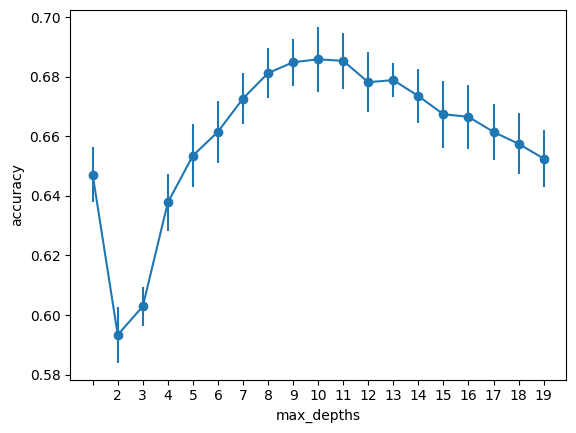

In [79]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

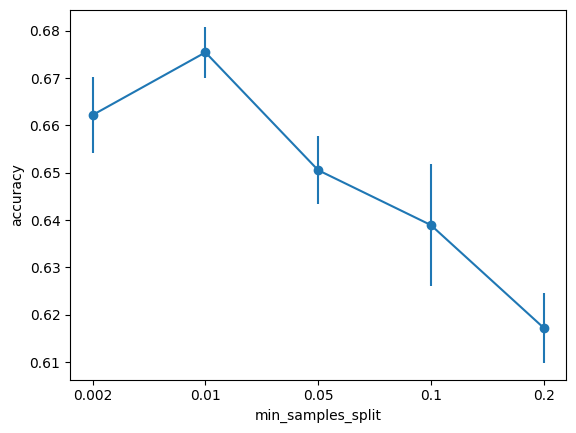

In [80]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

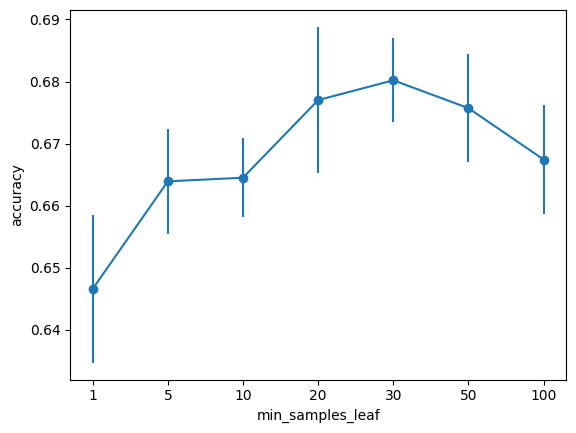

In [81]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized Search

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [83]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: total: 39.2 s
Wall time: 1min 55s


In [84]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'gini'} 0.6880239252883993


In [85]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.6845545758589237


In [86]:
clf.score(X_test, y_test)

0.6845545758589237

In [87]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9569296930996286
Train F1-score [0.94877549 0.95371669 0.97535518]

Test Accuracy 0.6845545758589237
Test F1-score [0.72054176 0.67713445 0.64088821]


In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2174
           1       0.64      0.72      0.68      2893
           2       0.76      0.55      0.64      1511

    accuracy                           0.68      6578
   macro avg       0.70      0.67      0.68      6578
weighted avg       0.69      0.68      0.68      6578



In [89]:
results = pd.DataFrame(random_search.cv_results_)

In [90]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.277135      0.057773         0.006459        0.002983   
1         0.224327      0.037099         0.004312        0.001023   
2         0.115148      0.024626         0.004242        0.001252   
3         0.199826      0.028510         0.004649        0.002044   
4         0.222426      0.032155         0.004438        0.000835   
..             ...           ...              ...             ...   
195       0.122864      0.009497         0.004152        0.001054   
196       0.234582      0.013330         0.004101        0.000729   
197       0.122967      0.008728         0.004238        0.001176   
198       0.078332      0.008068         0.005151        0.004032   
199       0.185774      0.013895         0.004177        0.001184   

     param_min_samples_split  param_min_samples_leaf param_max_depth  \
0                          2                      10              13   
1                         10                      30              14   
2                         30                      20               4   
3                         20                      50              15   
4                         20                      30              14   
..                       ...                     ...             ...   
195                       50                       5               5   
196                       50                      10              18   
197                       10                      10               7   
198                      100                       1               4   
199                        2                      10              15   

    param_criterion                                             params  \
0              gini  {'min_samples_split': 2, 'min_samples_leaf': 1...   
1           entropy  {'min_samples_split': 10, 'min_samples_leaf': ...   
2           entropy  {'min_samples_split': 30, 'min_samples_leaf': ...   
3           entropy  {'min_samples_split': 20, 'min_samples_leaf': ...   
4           entropy  {'min_samples_split': 20, 'min_samples_leaf': ...   
..              ...                                                ...   
195         entropy  {'min_samples_split': 50, 'min_samples_leaf': ...   
196         entropy  {'min_samples_split': 50, 'min_samples_leaf': ...   
197            gini  {'min_samples_split': 10, 'min_samples_leaf': ...   
198            gini  {'min_samples_split': 100, 'min_samples_leaf':...   
199            gini  {'min_samples_split': 2, 'min_samples_leaf': 1...   

     split0_test_score  ...  split43_test_score  split44_test_score  \
0             0.671987  ...            0.708700            0.688824   
1             0.679153  ...            0.702509            0.681004   
2             0.614007  ...            0.632128            0.616813   
3             0.681433  ...            0.697621            0.687520   
4             0.679153  ...            0.702509            0.681004   
..                 ...  ...                 ...                 ...   
195           0.644951  ...            0.664712            0.651352   
196           0.685342  ...            0.700880            0.689475   
197           0.683062  ...            0.704138            0.673183   
198           0.636808  ...            0.649397            0.627892   
199           0.669707  ...            0.702509            0.694037   

     split45_test_score  split46_test_score  split47_test_score  \
0              0.677524            0.684691            0.695992   
1              0.677199            0.686645            0.683284   
2              0.621173            0.620847            0.624633   
3              0.668078            0.684691            0.675138   
4              0.677199            0.689577            0.682959   
..                  ...                 ...                 ...   
195            0.636156            0.646254            0.648420   
196            0.666775          

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

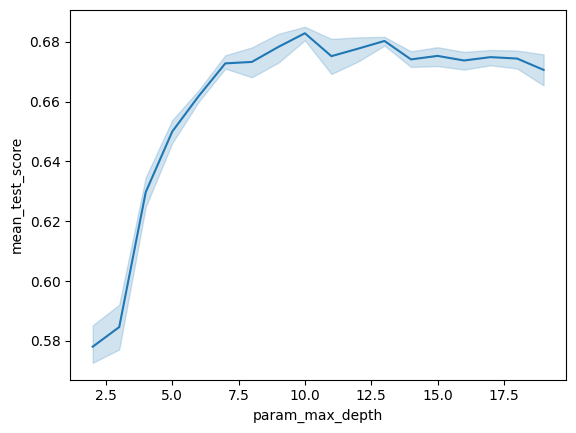

In [91]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

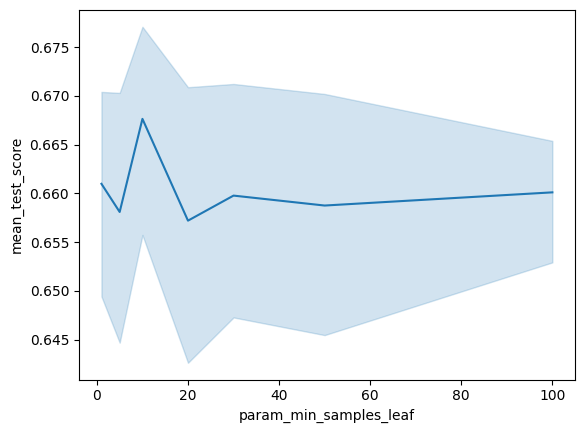

In [92]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [93]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

NumWish_log 0.34985791188103427
Rank:wargames 0.1393092250893659
NumUserRatings_log 0.10208956505678421
GameWeight 0.09310975981792735
Rank:familygames 0.06047827813453011
NumOwned_log 0.05987583612284268
ComWeight 0.02787512506122576
NumWant_log 0.021147610747725656
Publication_era_encoded 0.018198673190183475
MinPlayers_log 0.016436722883181924
Rank:strategygames 0.01283822236019241
Cat:Family 0.011842154111361254
LanguageEase__log 0.011711910995192072
Rank:partygames 0.010951863749951593
Kickstarted 0.01090893374393126
Cat:War 0.008103031306492123
ComMinPlaytime_log 0.006502211247405531
MfgPlaytime_log 0.005814837556219875
NumExpansions 0.005591802592977079
Rank:abstracts 0.00541759127481062
NumImplementations 0.003456327545796297
MfgAgeRec 0.0034169255641403763
Cat:Thematic 0.002878545526484077
ComMaxPlaytime_log 0.002707995007946782
Rank:thematic 0.0023448405683891994
Cat:Childrens 0.002137137084849139
Rank:childrensgames 0.0018041637906962295
BestPlayers 0.0011654041054380917
Max

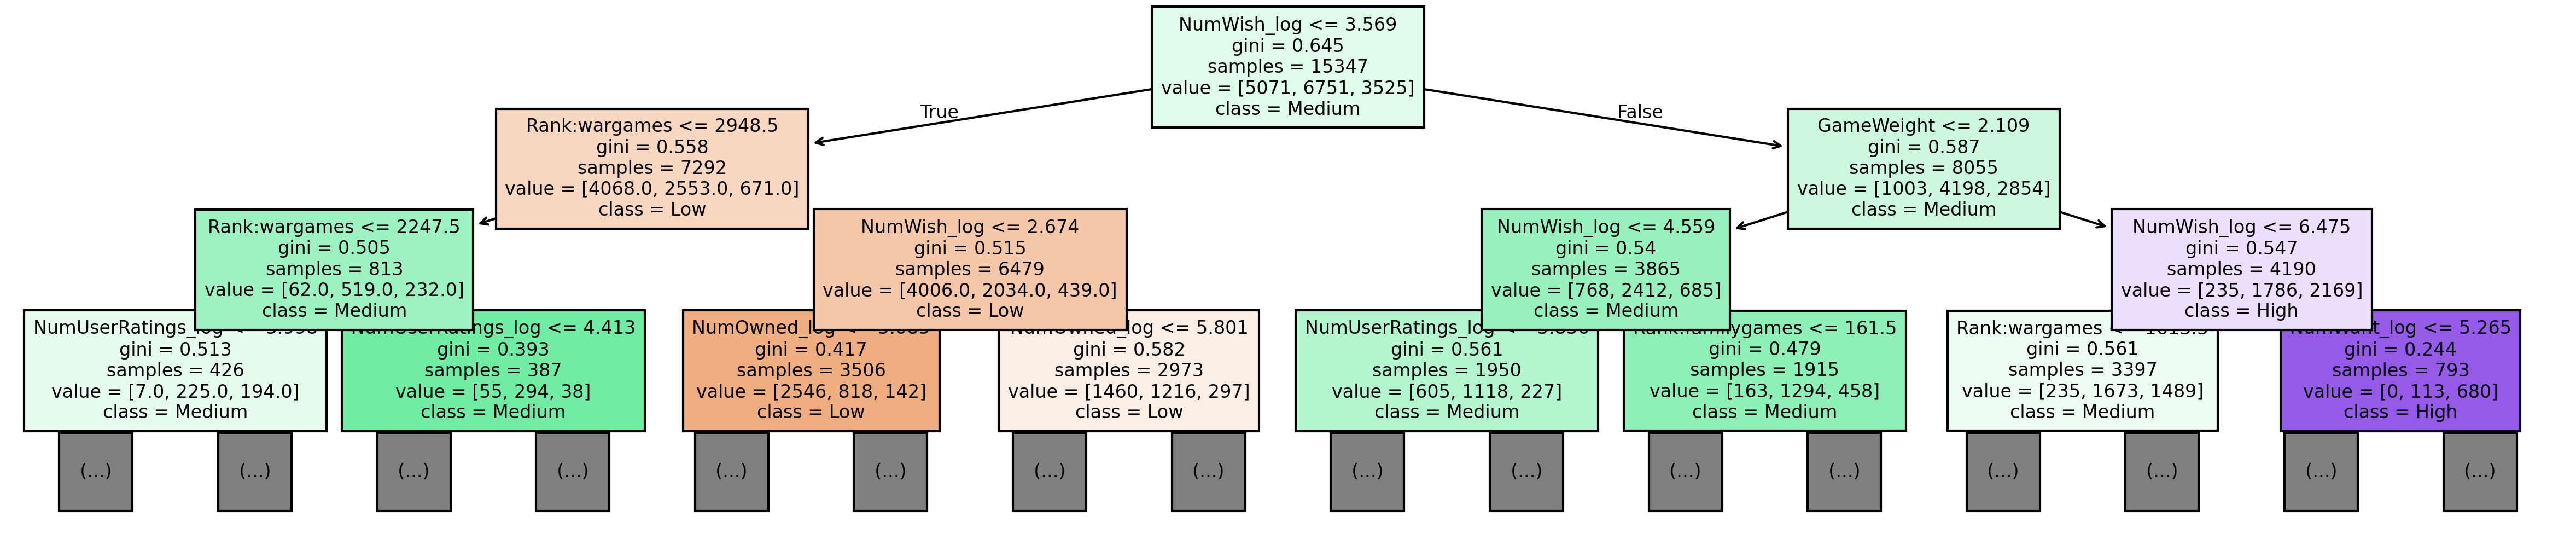

In [94]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True , class_names=['Low', 'Medium', 'High'], max_depth=3, fontsize=8)
plt.show()

#### ccp_alphas
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. <br>
Sklearn decision tree offers a function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [95]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [96]:
for alpha, imp in zip(ccp_alphas, impurities):
    print(alpha, imp)

0.0 0.3468136270200774
1.303186290480229e-05 0.3468266588829822
1.3031862904802304e-05 0.346839690745887
1.4216577714329758e-05 0.34685390732360133
1.5776763162310384e-05 0.34686968408676366
1.737581720640304e-05 0.34688705990397006
1.7918811494103116e-05 0.34690497871546416
1.8823801973603295e-05 0.34692380251743776
1.8823801973603295e-05 0.34694262631941136
1.8823801973603295e-05 0.34696145012138496
1.9858076807317774e-05 0.3469813081981923
1.9884297859440036e-05 0.3470011924960517
2.105147084621911e-05 0.34702224396689796
2.1719771508003696e-05 0.34704396373840596
2.223082495525089e-05 0.3470661945633612
2.223082495525089e-05 0.3470884253883164
2.3167756275204113e-05 0.3471115931445916
2.381685289498362e-05 0.3471354099974866
2.396181243786222e-05 0.34715937180992446
3.433603220952242e-05 0.347193707842134
4.0010105409480615e-05 0.3472337179475435
4.343954301600747e-05 0.3472771574905595
4.34395430160075e-05 0.3473205970335755
4.46303199627182e-05 0.3473652273535382
4.80549944614583

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

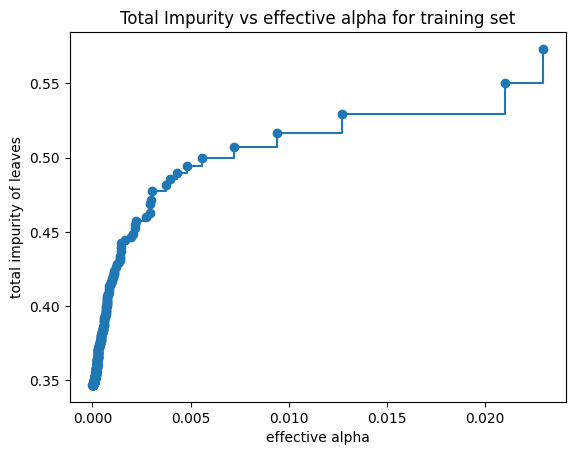

In [97]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [98]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 9,
 'criterion': 'gini'}

In [99]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07128687508075693


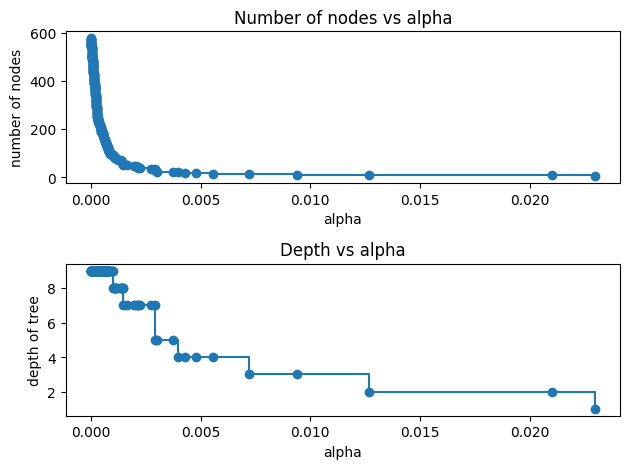

In [100]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

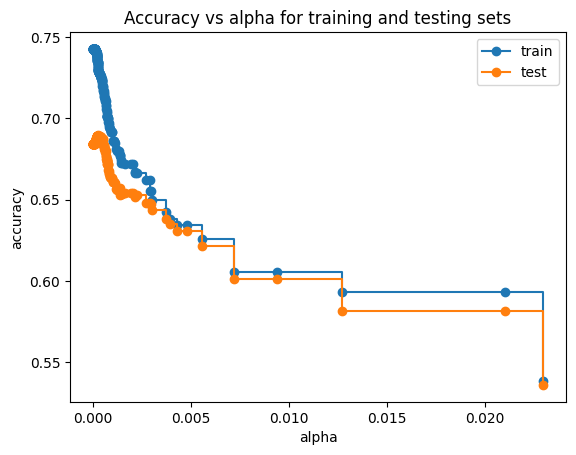

In [101]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [102]:
dtp = DecisionTreeClassifier()
dtp.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_test_pred = dtp.predict(X_test)

In [104]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9569296930996286
Train F1-score [0.94877549 0.95371669 0.97535518]

Test Accuracy 0.6579507449072667
Test F1-score [0.67417279 0.64605873 0.65749748]


In [105]:
y_test_pred = dtp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.6579507449072667


In [106]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2174
           1       0.64      0.65      0.65      2893
           2       0.67      0.65      0.66      1511

    accuracy                           0.66      6578
   macro avg       0.66      0.66      0.66      6578
weighted avg       0.66      0.66      0.66      6578



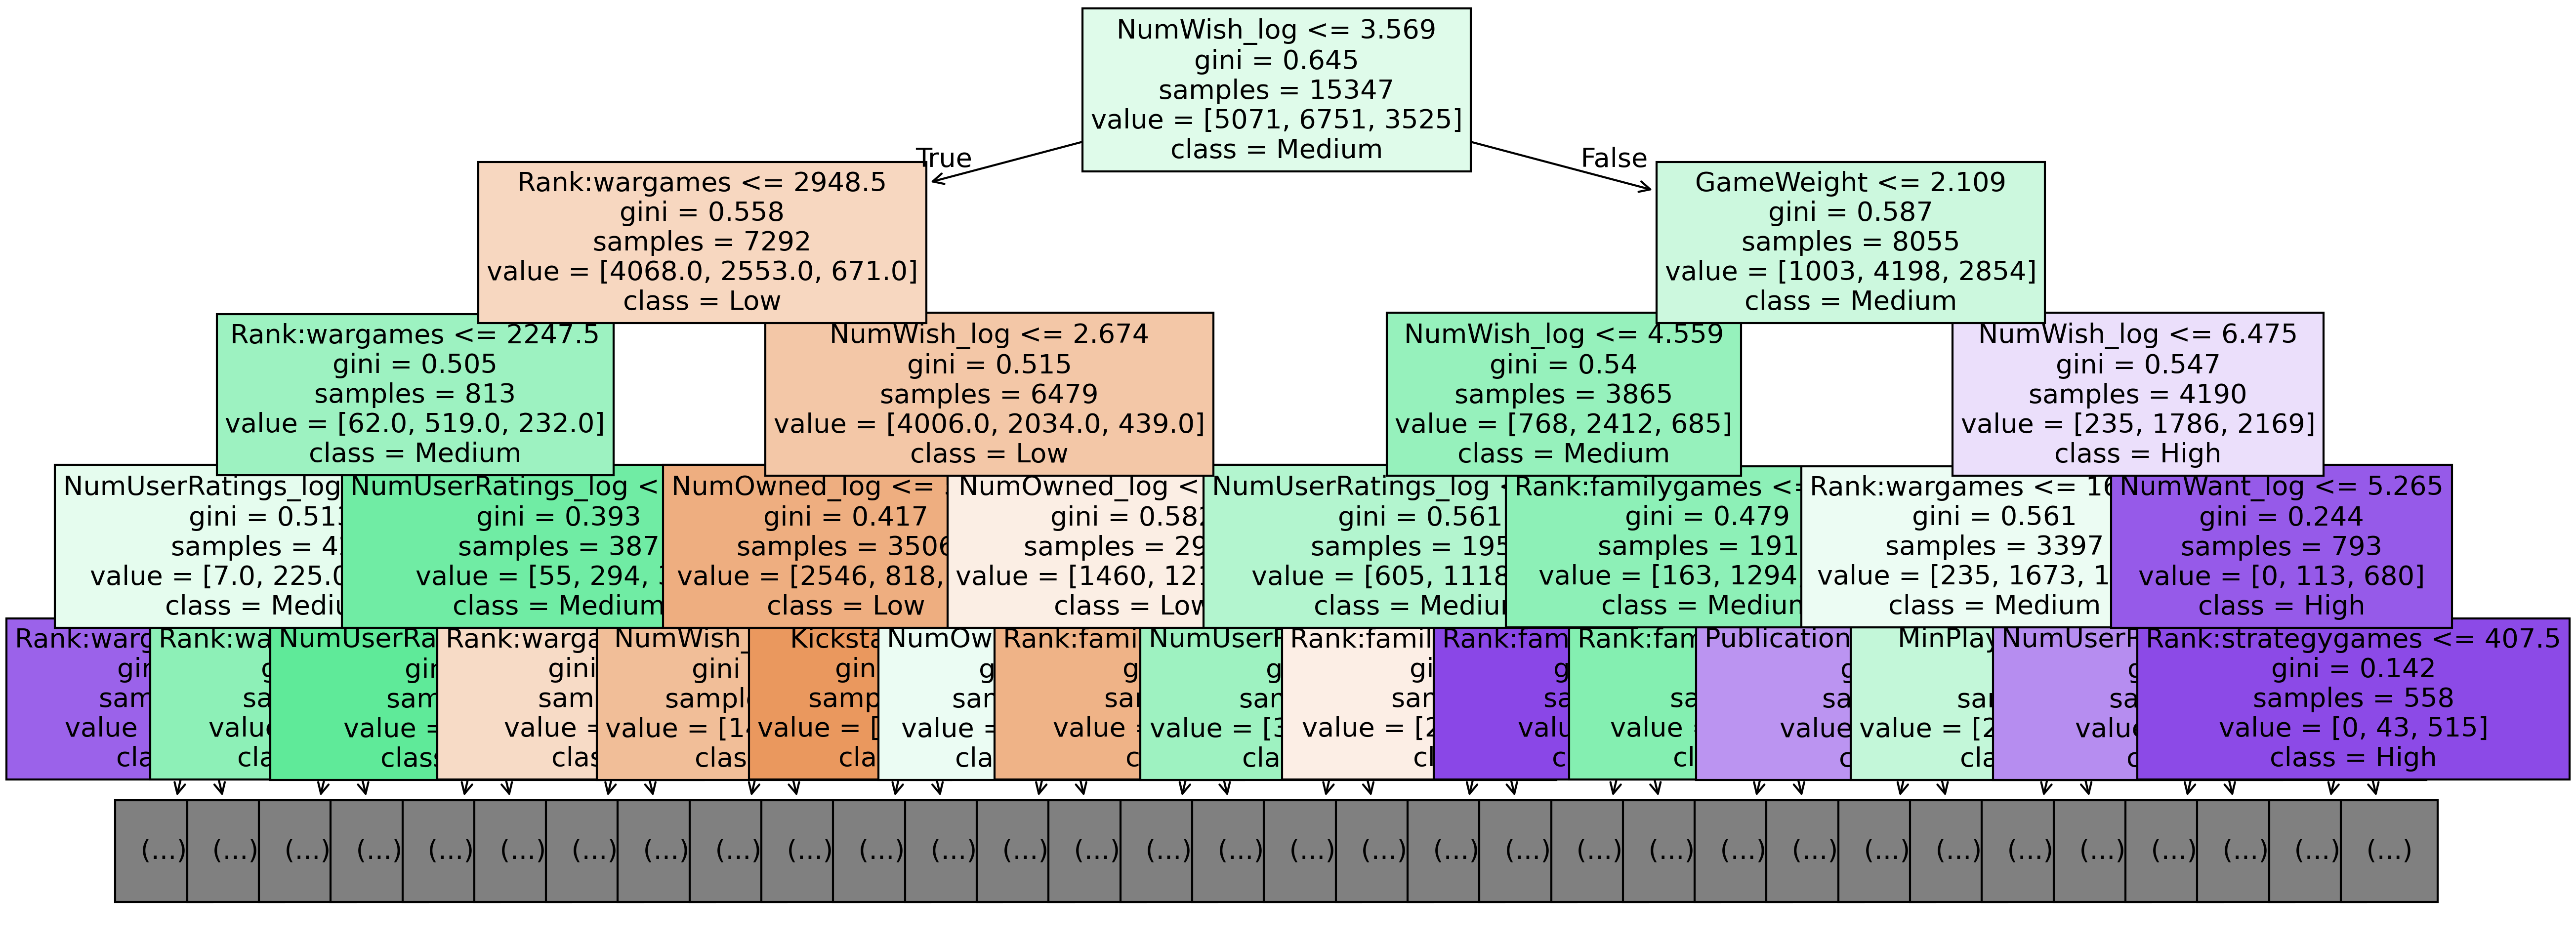

In [107]:

plt.figure(figsize=(20, 8), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True, fontsize=13 , class_names=['Low', 'Medium', 'High'], max_depth=4)
plt.show()

### ROC Curves

In [108]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

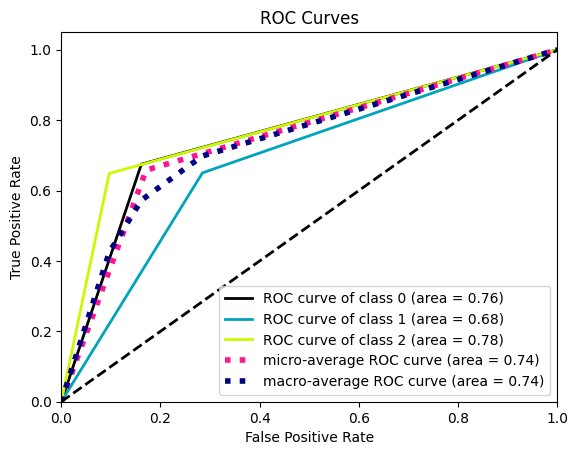

In [109]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

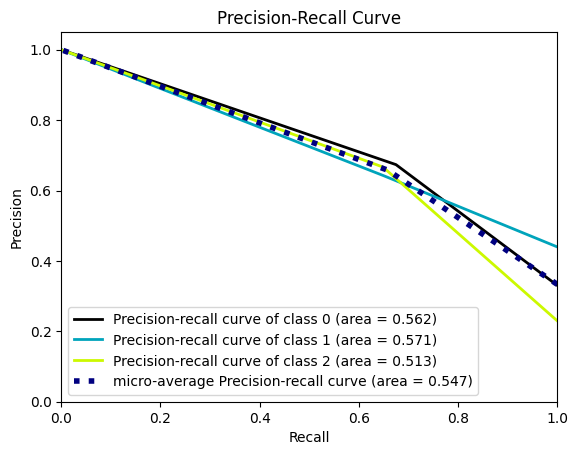

In [110]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()

### Pruning Utils
In scikit-learn's decision trees, it can sometimes occur that a node split creates branches where all subsequent splits lead to the same predicted label as the node itself. In such cases, these branches do not contribute additional information to the predictions. Tree pruning functions are designed to simplify the tree by removing such redundant branches, keeping only the root node of the branch. This process reduces the complexity of the tree and is particularly useful for improving interpretability and visualization.

In [111]:
from sklearn.tree._tree import TREE_LEAF

In [112]:
def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and
            inner_tree.children_right[index] == TREE_LEAF)


def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        # print("Pruned {}".format(index))


def prune_duplicate_leaves(dt):
    # Remove leaves if both
    decisions = dt.tree_.value.argmax(axis=2).flatten().tolist()  # Decision for each node
    prune_index(dt.tree_, decisions)

In [113]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=5, min_samples_leaf=5, random_state=94)

In [114]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5, random_state=94)

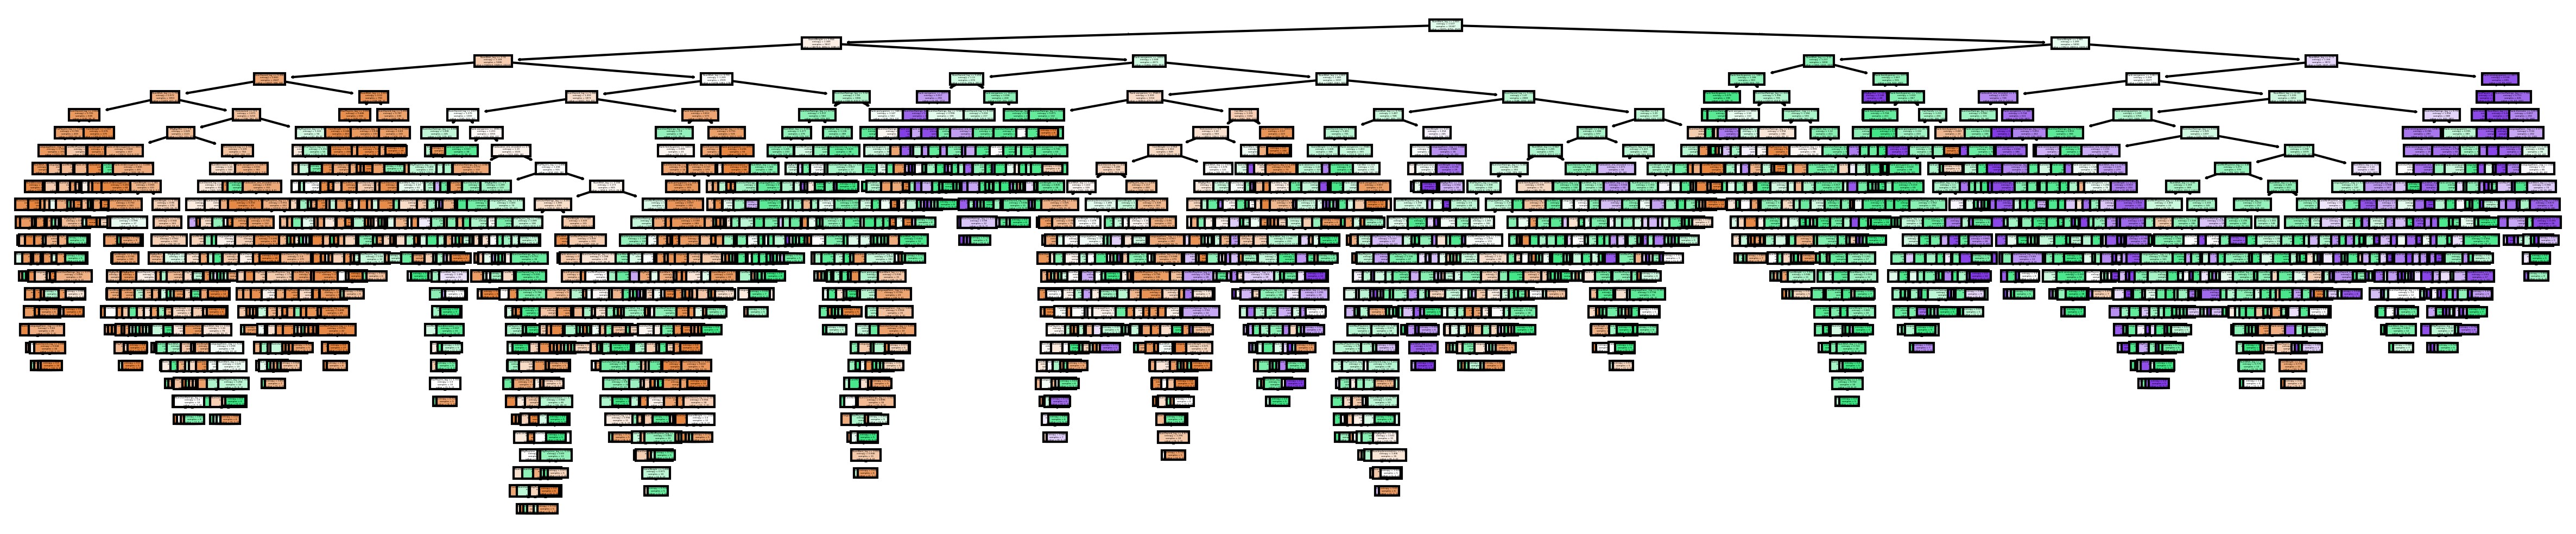

In [115]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [116]:
prune_duplicate_leaves(dt)

In [117]:
# let us visualise it again after pruning

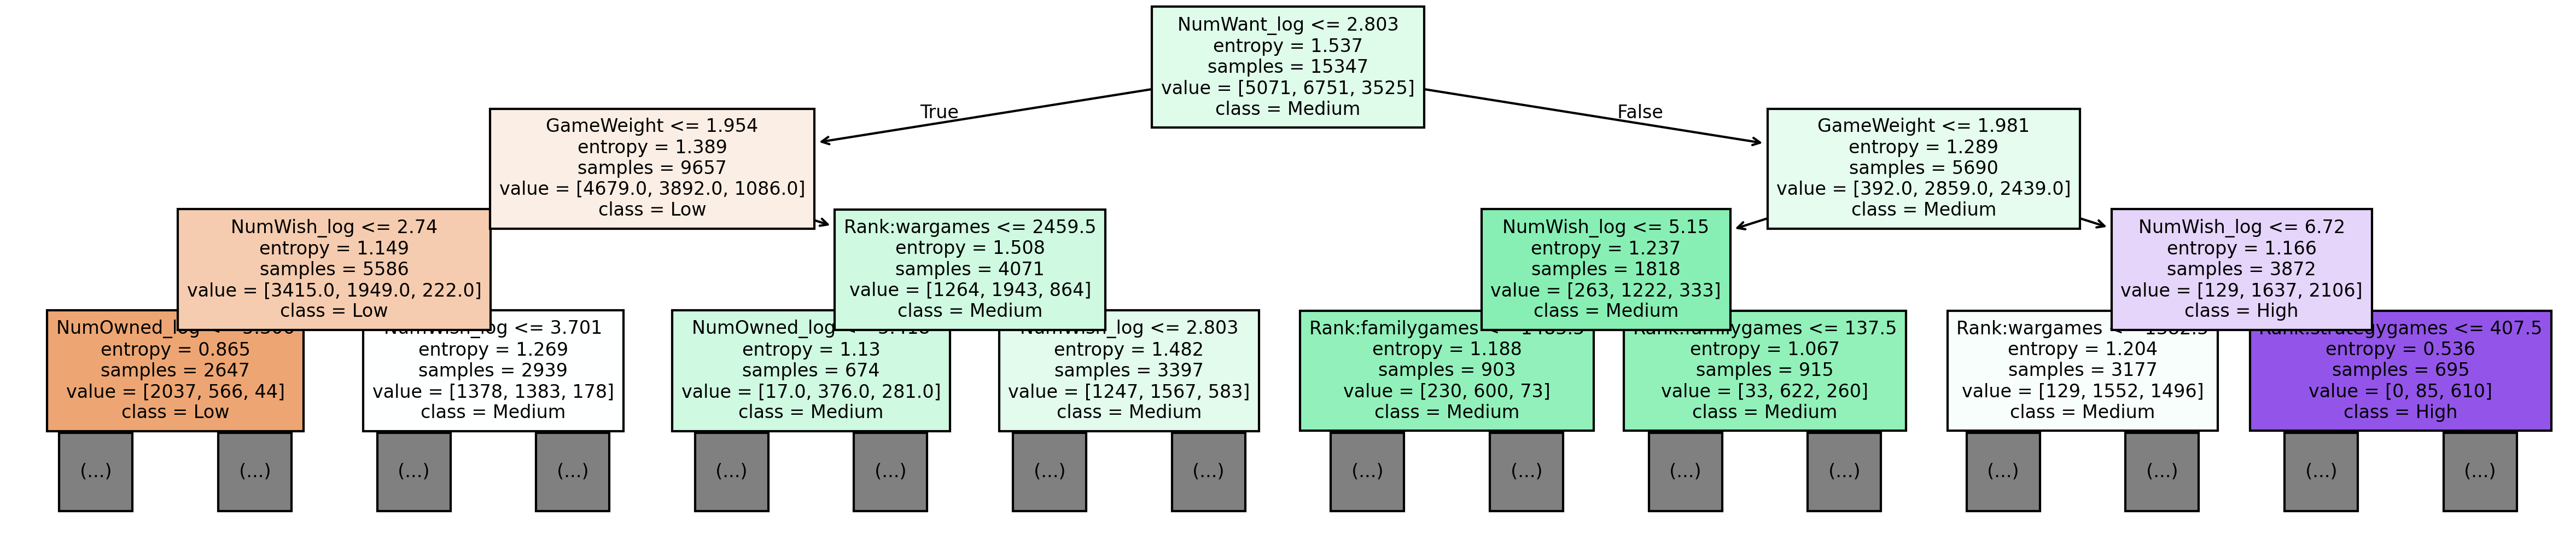

In [119]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True , class_names=['Low', 'Medium', 'High'], max_depth=3, fontsize=8)
plt.show()

### RuleTree

RuleTree is a sklearn-inspired Decision Tree library developed internally in the KDD lab. It is capable of directly handling the "children with same classes" problem directly in its parameters.

Feel free to explore RuleTrees: using scikit learn implementation is mandatory, while using RuleTree is an additional exploration you can do

For code examples on classification and code implementation, check:  

https://github.com/fismimosa/RuleTree

https://github.com/fismimosa/RuleTree/blob/main/Examples/RuleTreeClassifier_example.ipynb


The correct import is **RuleTree.tree.RuleTreeClassifier**, not ruletree.tree.RuleTreeClassifier as in the repository, which still need to be updated

In [131]:
!pip install RuleTree

^C


In [ ]:
#Initialize the RuleTreeClassifier and train it on your dataset


from RuleTree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 206] Nom de fichier ou extension trop long: 'C:\\Users\\Steve\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\benchmark\\competitors\\Competitors\\algorithmic_fairness\\SOTA\\Fair Algorithms for clustering (Bera)\\Kmeans_Kmedian'



  Using cached ruletree-2026.1.14.110547-py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached ruletree-2026.1.14.110547-py3-none-any.whl (198 kB)
Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl (36.4 MB)
Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl (13.1 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.26.4

   ---------------------------------------- 0/3 [numpy]
    Uninstalling numpy-1.26.4:
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 [numpy]
   ---------------------------------------- 0/3 

In [124]:
X_train.shape, attributes

((15347, 37),
 ['GameWeight',
  'ComWeight',
  'BestPlayers',
  'MfgAgeRec',
  'NumAlternates',
  'NumExpansions',
  'NumImplementations',
  'IsReimplementation',
  'Kickstarted',
  'Rank:strategygames',
  'Rank:abstracts',
  'Rank:familygames',
  'Rank:thematic',
  'Rank:cgs',
  'Rank:wargames',
  'Rank:partygames',
  'Rank:childrensgames',
  'Cat:Thematic',
  'Cat:Strategy',
  'Cat:War',
  'Cat:Family',
  'Cat:CGS',
  'Cat:Abstract',
  'Cat:Party',
  'Cat:Childrens',
  'Is_traditional_game',
  'MaxPlayers_log',
  'MinPlayers_log',
  'LanguageEase__log',
  'NumOwned_log',
  'NumWant_log',
  'NumWish_log',
  'MfgPlaytime_log',
  'ComMaxPlaytime_log',
  'ComMinPlaytime_log',
  'NumUserRatings_log',
  'Publication_era_encoded'])

In [ ]:
rtc = RuleTreeClassifier(
    max_depth=3,
    criterion='gini',
    prune_useless_leaves=True, ##prune_useless_leaves performing the pruning internally for you without the need to access external functions
    random_state=42
)


IMPORTANT DETAIL: for training, both X_train and y_train should be numpy objects, not pandas series

In [ ]:
# Fit the RuleTreeClassifier to the training data
rtc.fit(X_train, np.array(y_train))

RuleTreeClassifier(base_stumps=[(1.0,
                                 DecisionTreeStumpClassifier(ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=1,
                                                             max_features=None,
                                                             min_impurity_decrease=0.0,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             monotonic_cst=None,
                                                             random_state=42,
                                                             splitter='best'))],
                   max_depth=3, prune_useless_leaves=True, random_state=42)

In [ ]:
# Extract the rules as a dictionary using feature names
rules = rtc.get_rules(columns_names=attributes)

In [ ]:
# Print textual rules of trained tree
rtc.print_rules(rules, columns_names=attributes)

|--- Sex <= 0.5	623
|   |--- Pclass <= 2.5	220
|   |   |--- Fare <= 5.75	115
|   |   |    output: 0
|   |   |--- Fare > 5.75
|   |   |    output: 1
|   |--- Pclass > 2.5
|   |   |--- FamilySize <= 4.5	105
|   |   |    output: 1
|   |   |--- FamilySize > 4.5
|   |   |    output: 0
|--- Sex > 0.5
|   |--- Age <= 6.5	403
|   |   |--- FamilySize <= 4.5	20
|   |   |    output: 1
|   |   |--- FamilySize > 4.5
|   |   |    output: 0
|   |--- Age > 6.5
|   |    output: 0


In [ ]:
y_pred = rtc.predict(X_test)

In [ ]:
print('Accuracy result\n', accuracy_score(y_test, y_pred))

Accuracy result
 0.8283582089552238


In [ ]:
# Obtain global feature importances similar to sklearn feature_importances_ of a trained Tree
feture_importances = rtc.compute_feature_importances()
for attr, imp in zip(attributes, feture_importances):
  print(attr, imp)

Pclass 0.17992977235110494
Sex 0.6098058869982659
Age 0.07982962656091805
Fare 0.01365006097271372
FamilySize 0.11678465311699747
IsAlone 0.0
Embarked_C 0.0
Embarked_Q 0.0
Embarked_S 0.0


In [ ]:
# Get local feature importances similar to https://github.com/andosa/treeinterpreter implementation
# Prediction is the sum of bias and feature contributions
prediction, bias, contributions = rtc.local_interpretation(X_test, joint_contribution= True)

In [ ]:
prediction[0], bias[0], contributions[0]

(array([0.83289817, 0.16710183]),
 array([0.61637239, 0.38362761]),
 {(1,): array([ 0.19007922, -0.19007922]),
  (1, 2): array([ 0.02644656, -0.02644656])})

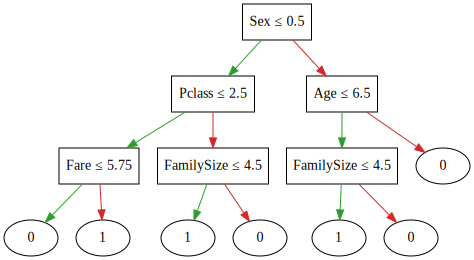

In [ ]:
rtc.export_graphviz(columns_names = attributes)

In [ ]:
rtc.export_graphviz(columns_names = attributes, filename = 'data/rtc_plot_tree') #adding filename will save a pdf of the plot

In [170]:
#directly obtain information on the nodes in the tree

rtc.root.node_to_dict()

{'node_id': 'R',
 'is_leaf': False,
 'prediction': 0,
 'prediction_probability': [0.6163723916532905, 0.38362760834670945],
 'prediction_classes_': [0, 1],
 'features': 9,
 'left_node': 'Rl',
 'right_node': 'Rr',
 'feature_idx': 1,
 'threshold': 0.5,
 'is_categorical': None,
 'samples': 623,
 'feature_name': 'X_1',
 'textual_rule': 'X_1 <= 0.5\t623',
 'blob_rule': 'X_1 <= 0.5',
 'graphviz_rule': {'label': 'X_1 ≤ 0.5'},
 'not_textual_rule': 'X_1 > 0.5',
 'not_blob_rule': 'X_1 > 0.5',
 'not_graphviz_rule': {'label': 'X_1 > 0.5'},
 'stump_type': 'RuleTree.stumps.classification.DecisionTreeStumpClassifier',
 'impurity': 0.4729149329217863,
 'args': {'is_oblique': False,
  'is_pivotal': False,
  'unique_val_enum': None,
  'coefficients': None,
  'max_depth': 1,
  'criterion': 'gini',
  'splitter': 'best',
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.0,
  'max_features': None,
  'random_state': 42,
  'min_impurity_decrease': 0.0,
  'class_weight': None,


In [171]:
#navigate the tree from the root with .node_l and .node_r
rtc.root.node_l.node_to_dict()

{'node_id': 'Rl',
 'is_leaf': False,
 'prediction': 1,
 'prediction_probability': [0.2681818181818182, 0.7318181818181818],
 'prediction_classes_': [0, 1],
 'features': 9,
 'left_node': 'Rll',
 'right_node': 'Rlr',
 'feature_idx': 0,
 'threshold': 2.5,
 'is_categorical': None,
 'samples': 220,
 'feature_name': 'X_0',
 'textual_rule': 'X_0 <= 2.5\t220',
 'blob_rule': 'X_0 <= 2.5',
 'graphviz_rule': {'label': 'X_0 ≤ 2.5'},
 'not_textual_rule': 'X_0 > 2.5',
 'not_blob_rule': 'X_0 > 2.5',
 'not_graphviz_rule': {'label': 'X_0 > 2.5'},
 'stump_type': 'RuleTree.stumps.classification.DecisionTreeStumpClassifier',
 'impurity': 0.3925206611570248,
 'args': {'is_oblique': False,
  'is_pivotal': False,
  'unique_val_enum': None,
  'coefficients': None,
  'max_depth': 1,
  'criterion': 'gini',
  'splitter': 'best',
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.0,
  'max_features': None,
  'random_state': 42,
  'min_impurity_decrease': 0.0,
  'class_weight': None